In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv as csv 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import datetime
from matplotlib.ticker import FuncFormatter

C:\Users\Arunima\AppData\Local\Temp/ipykernel_9068/3001902355.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [55]:
import os
for dirname, _, filenames in os.walk('C:/Users/Arunima/Downloads/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



C:/Users/Arunima/Downloads/input\airline_expenses.csv
C:/Users/Arunima/Downloads/input\airline_passengers.csv
C:/Users/Arunima/Downloads/input\airline_revenues.csv
C:/Users/Arunima/Downloads/input\all_data.csv
C:/Users/Arunima/Downloads/input\industry_totals.csv
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Cash flow statement\Net Cash Provided by (Used in) Financing Activities.xls
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Cash flow statement\Net Cash Provided by (Used in) Investing Activities.xls
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Cash flow statement\Net Cash Provided by (Used in) Operating Activity.xls
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Cash flow statement\Net Increase (Decrease) in Cash.xls
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Cash flow statement\Payments on Long-term Debt and Capital Lease Obligations.xls
C:/Users/Arunima/Downloads/in

C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Total fleet\Average Seat Capacity of Total Operating Fleet.xls
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Total fleet\Average Stage Length Flown of Total Operating Fleet.xls
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Total fleet\Departure per Aircraft Day - ALL AIRCRAFT.xls
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Total fleet\Gallons of Fuel per Block Hour - ALL AIRCRAFT.xls
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Total fleet\Total Aircraft Airborne Hours - ALL AIRCRAFT.xls
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Total fleet\Total Aircraft Block Hours - ALL AIRCRAFT.xls
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Total fleet\Total Operating Fleet.xls
C:/Users/Arunima/Downloads/input\Original MIT data\Original MIT data\Total fleet\unused\Average Daily Airborn

In [56]:
def import_df(path, column, new_col_name, formatting=0, remove_unnamed=True):
    df=pd.read_excel(("C:/Users/Arunima/Downloads/input/Original MIT data/Original MIT data"+path))
    if remove_unnamed==True:
        df=df.drop(["Unnamed: 1"],axis=1) #removing empty column
    else:
        pass
    df=df[4:] #deleting unwanted row
    df=df.transpose() #transposing data frame
    df=pd.DataFrame(df.iloc[1:,column])
    df["Year"]=np.arange(1995,2019,1) #make a series to fill in year column
    df.reset_index(drop=True, inplace=True) #reset index
    df.set_index("Year", inplace=True) #make year the new index
    df=df*(10**(formatting))
    df.rename(columns={(column+4):new_col_name}, inplace=True)#renaming column
    return df

In [58]:
# Revenues
#Importing and creating dataframe of all revenue reated metric totals (Domestic + International+ Others)

#Total system revenue

total_revenue = import_df(path = '/Total revenue/System Total Operating Revenue.xls',column = 25, new_col_name = 'Total Operating Revenue ($)',formatting = 9)
rev_per_asm = import_df(path ='/Total revenue/System Total Revenue (Ex- Transport Related) per ASM.xls', column =23, new_col_name ='System Revenue Per ASM (exc-transport) ($ per ASM)', formatting =-2)
sys_pass_rev = import_df(path ='/Total revenue/System Passenger Revenue.xls', column = 25,  new_col_name ="System Passenger Revenue ($)", formatting = 9 )
PRASM = import_df(path ='/Total revenue/System Passenger Revenue per Available Seat Mile (PRASM).xls', column =23, new_col_name ='System Passenger Revenue per ASM ($)', formatting =9)
pass_yield = import_df(path ='/Total revenue/System Passenger Yield.xls', column = 23, new_col_name = 'System Passenger Yield ($ per RPM)', formatting = -2)
trans_rev = import_df(path ='/Total revenue/System Total Transport Related Revenue.xls', column = 25, new_col_name ='System Total Transport Related Revenue ($)', formatting = 9)
ancillary = import_df(path ='/Total revenue/Ancillary Fee Revenue.xls', column =23, new_col_name ='Ancillary Fees ($)', formatting =3)

#all Revenues table

revenue=pd.concat([total_revenue,sys_pass_rev,trans_rev,PRASM,rev_per_asm,pass_yield,ancillary], axis=1)
revenue=revenue.astype('float64')

In [59]:
# Employee compensation

FT_equiv = import_df(path ='/Total employee compensation/Total Full-time Employee Equivalents.xls', column =23, new_col_name ='Full Time Employees Equivalents')
FT_NC_equiv = import_df(path ='/Total employee compensation/Total Full-time Employee Non Cockpit Equivalents.xls', column =23, new_col_name = 'Full Time Non Cockpit Employees Equivalents')
all_wages_avg = import_df(path ='/Total employee compensation/Average Annual Wages and Salaries - All Employees.xls', column =24, new_col_name ='All Employees Avg Wage ($)')
NC_wages_avg = import_df(path ='/Total employee compensation/Average Annual Wages and Salaries - All Non-Cockpit Employees.xls', column= 24, new_col_name ='Non Cockpit Employees Avg Wage ($')
#all employees avg benefits
all_benefits = import_df(path ='/Total employee compensation/Average Pension and Benefit Package - ALL EMPLOYEES.xls', column =24, new_col_name ='All Employees average benefits and pensions ($)')
#Non cockpit employees avg benefits
NC_benefits = import_df( path ='/Total employee compensation/Average Pension and Benefit Package - ALL NON-COCKPIT EMPLOYEES.xls', column =24, new_col_name ='Non-Cockpit Employees average benefits and pensions ($)')
#Pilot employee equivalents
pilot_equiv = import_df(path ='/Total employee compensation/Total Pilot and Copilot Employee Equivalents.xls', column= 23, new_col_name='Pilot and Co-Pilot equivalents')
#Pilot employee wages
pilot_wage = import_df(path ='/Total employee compensation/Average Annual Wages and Salaries - PILOT AND CO-PILOT PERSONNEL.xls', column= 24, new_col_name='Average Pilot and Co-Pilot wages ($)')
#flight attendant equivalents
FA_equiv = import_df(path ='/Total employee compensation/Total Flight Attendant Employee Equivalents.xls', column =23,new_col_name='Flight Attendant Employee Equivalents')
#flight attendant wages
FA_wage = import_df(path ='/Total employee compensation/Average Annual Wages and Salaries - FLIGHT ATTENDANT PERSONNEL.xls', column =24, new_col_name ='Average Flight Attendant Employee Wage ($)')
#ground staff equivalents
ground_equiv = import_df(path ='/Total employee compensation/Total In-House Passenger, Cargo and Aircraft Handling Employee Equivalents.xls', column =23, new_col_name ='Ground Staff Employee Equivalents')
#average ground staff wages
avg_ground_wage = import_df(path ='/Total employee compensation/Average Annual Wages and Salaries - INHOUSE PASSENGER, CARGO AND AIRCRAFT HANDLING PERSONNEL.xls', column =24, new_col_name='Average Ground Staff Employee Wage ($)')
#maintenance employee equivalents
maint_equiv = import_df(path ='/Total employee compensation/Total In-House Maintenance Employee Equivalents.xls', column =23, new_col_name ='Maintenance Staff Equivalents')
#average maintenance employee wage
maint_wage = import_df(path ='/Total employee compensation/Average Annual Wages and Salaries - INHOUSE MAINTENANCE PERSONNEL.xls', column =24, new_col_name ='Average Maintenance Staff Wage ($)')
#Management equivalents
mgmnt_equiv = import_df(path ='/Total employee compensation/Total Management and Other Employee Equivalents.xls', column = 23, new_col_name ='Management and Others Equivalents')
#Management wage
mgmnt_wage = import_df(path ='/Total employee compensation/Average Annual Wages and Salaries - GENERAL MANAGEMENT AND OTHER PERSONNEL.xls', column =24, new_col_name ='Average Management and Others Wage ($)')
compensation = pd.concat([all_wages_avg,NC_wages_avg,FT_equiv,FT_NC_equiv,all_benefits,NC_benefits,pilot_equiv,pilot_wage,FA_equiv,FA_wage,ground_equiv,avg_ground_wage,maint_equiv,maint_wage,mgmnt_equiv,mgmnt_wage], axis=1)
compensation = compensation.astype('float64')

In [60]:
asm_per_comp = import_df('/Total employees and productivity/Total ASMs Produced per Dollar of Employee Compensation.xls', column =23, new_col_name ='ASM Prodcued per Dollar Employee Compensation')
#ASM produced per equivalent employee
asm_per_equiv = import_df('/Total employees and productivity/Total ASMs Produced per Employee Equivalent.xls', column =23, new_col_name ='ASM Prodcued per Employee Equivalent')
#ASM produced per dollar pilot compensation 
asm_per_pilot_comp = import_df('/Total employees and productivity/Total ASMs Produced per Dollar of Total Pilot Compensation.xls', column =24, new_col_name='ASM Prodcued per Dollar Pilot Compensation')
#Flight Attendant average block hours per month
FA_avg_hours = import_df('/Total employees and productivity/Total Flight Attendant Average Block Hours per Month.xls', column =24, new_col_name ='Total Flight Attendant Block Hours per Month')
# % of maintenance expense outsource
maint_out = import_df('/Total employees and productivity/Percent of Maintenance Expenses Outsourced.xls', column= 24, new_col_name ='Percentage of maintenance expense outsourced')
#Handling employees per a/c
handling_per_ac = import_df('/Total employees and productivity/Passenger, Cargo and Aircraft Handling Employees per Aircraft.xls', column =24,  new_col_name ='Handling Employees per Aircraft')

productivity=pd.concat([asm_per_equiv,asm_per_comp,asm_per_pilot_comp,FA_avg_hours,maint_out,handling_per_ac], axis=1)
productivity=productivity.astype('float64')

In [61]:
#Expenses

total_op_expense = import_df('/Total Expenses related/System Total Operating Expenses.xls', column= 25, new_col_name ='Total Operating Expenses ($)', formatting =9)
#labour expenses
labour_exp = import_df('/Total Expenses related/System Total Labor and Related Expenses.xls', column=23, new_col_name ='Total Labour Operating Expenses ($)', formatting =9)
#labour expenses per ASM (LCASM)
LCASM = import_df('/Total Expenses related/System Total Labor and Related Expense per Available Seat Mile (LCASM).xls', column =23, new_col_name=' Total Labour Operating Expenses per ASM($)',formatting =9)
#Total Fuel expense
fuel_exp = import_df('/Total Expenses related/Total Fuel Expense.xls', column=23, new_col_name='Total Fuel Expenses ($)', formatting =6)
#Total gallons of fuel
fuel_gallons = import_df('/Total Expenses related/Total Gallons of Fuel.xls', column= 23, new_col_name='Total Fuel in Gallons', formatting =6)
#Price per gallon fuel 
fuel_price = import_df('/Total Expenses related/Total Price per Gallon of Fuel.xls', column= 23, new_col_name ='Fuel price per Gallon ($)')
#fuel expenses per ASM
fuel_asm = import_df('/Total Expenses related/Fuel Expense per ASM.xls', column =23, new_col_name='Total Fuel Expense per ASM')
#fuel expense per passenger
fuel_per_pass = import_df('/Total Expenses related/Fuel Expense per Enplaned Passenger.xls', column=23, new_col_name ='Fuel Expense per Enplaned Passenger ($)')
#CASM ex transport
casm_ex_trans = import_df('/Total Expenses related/System Total Expense per Available Seat Mile (CASM ex Transport Related).xls',column= 23, new_col_name='CASM excluding Transport ($ per ASM)', formatting =-2)
#CASM ex transport, fuel
casm_ex_trans_fuel = import_df('/Total Expenses related/System Total Expense per Available Seat Mile (CASM ex fuel and Transport Related).xls', column= 23, new_col_name='CASM excluding Transport and Fuel ($ per ASM)', formatting =-2)                         
#CASM ex transport, fuel, labour
casm_ex_trans_fuel_lab = import_df('/Total Expenses related/System Non-Labor Expense per Available Seat Mile (CASM ex fuel, Transport Related and Labor).xls', column =23, new_col_name ='CASM excluding Transport Fuel and labour ($ per ASM)', formatting =-2)                          
#transport related 
transport_exp = import_df('/Total Expenses related/Transport Related Expenses.xls', column= 23, new_col_name ='Transport Related Expenses ($)', formatting =6)
#other outsourcing 
outsource_exp = import_df('/Total Expenses related/Total Other Outsourcing Expense.xls', column =23, new_col_name ='Other Outsourcing Expenses ($)', formatting =6)
#management and other 
mgmnt_exp = import_df('/Total Expenses related/System Total Management and Other.xls', column =23, new_col_name ='Management and Other Expenses ($)', formatting =9)
#mgmnt and other per ASM
mgmnt_asm = import_df('/Total Expenses related/System Management and Other Expense per Available Seat Mile.xls', column=23, new_col_name ='Management and Other Expenses per ASM')
#flight equipment maintenance 
equip_maint_exp = import_df('/Total Expenses related/Total Flight Equipment Maintenance Expense.xls',  column =23, new_col_name ='Flight Equipment Maintenance Expense ($)', formatting =6)
#outsource flight equipment maintenance
outs_equip_maint = import_df('/Total Expenses related/Total Outsourced Flight Equipment Maintenance Expense.xls', column =23, new_col_name ='Outsourced Flight Equipment Maintenance Expense ($)', formatting =6)

expenses=pd.concat([total_op_expense,labour_exp,LCASM,fuel_exp,fuel_asm,fuel_per_pass,fuel_gallons,fuel_price,transport_exp,outsource_exp,mgmnt_exp,mgmnt_asm,equip_maint_exp,outs_equip_maint, casm_ex_trans,casm_ex_trans_fuel,casm_ex_trans_fuel_lab], axis=1)
expenses = expenses.astype('float64')

In [62]:
# Fleet

#total operating fleet
op_fleet = import_df('/Total fleet/Total Operating Fleet.xls', column = 23, new_col_name='Total operating fleet numbers')
#aircraft block hours
ac_block_hours = import_df('/Total fleet/Total Aircraft Block Hours - ALL AIRCRAFT.xls', column =24, new_col_name='Total Aircraft Block Hours')
#aircraft airborne hours
ac_airborne_hours = import_df('/Total fleet/Total Aircraft Airborne Hours - ALL AIRCRAFT.xls', column=24, new_col_name='Total Aircraft Airborne Hours')
#Gallons of fuel per block hour
gallons_per_block_hour = import_df('/Total fleet/Gallons of Fuel per Block Hour - ALL AIRCRAFT.xls', column= 24, new_col_name='Gallons Fuel per Block Hour')
#Average stage length flown
avg_stage_length = import_df('/Total fleet/Average Stage Length Flown of Total Operating Fleet.xls', column=23, new_col_name='Average Stage Length Flown')
#Average seat capacity 
avg_seat_capacity = import_df('/Total fleet/Average Seat Capacity of Total Operating Fleet.xls',column= 23, new_col_name ='Average Seat Capacity per Aircraft')
#Departure per aircraft day
dep_per_ac = import_df('/Total fleet/Departure per Aircraft Day - ALL AIRCRAFT.xls', column =21, new_col_name ='Departure per Aircraft Day', remove_unnamed= False)
#all total fleet data
fleet=pd.concat([op_fleet,ac_block_hours,ac_airborne_hours,gallons_per_block_hour,avg_stage_length,avg_seat_capacity,dep_per_ac], axis=1)
fleet=fleet.astype('float64')


In [63]:
# Traffic and Capacity

total_asm = import_df('/Total traffic and capacity by op region/Total System Available Seat Miles.xls', 25, 'Total Available Seat Miles (ASM)', 6)
#total rpm
total_rpm = import_df('/Total traffic and capacity by op region/Total System Revenue Passenger Miles.xls', 25, 'Total Revenue Passenger Mile (RPM)', 6)
#total enplaned passengers
total_pass = import_df('/Total traffic and capacity by op region/System Total Enplaned Passengers.xls', 23, 'Total Enplaned Passengers', 3)
#total load factor
total_load = import_df('/Total traffic and capacity by op region/Total System Load Factor.xls', 23, 'Total Load Factor (%)', 2)
#total passenger yield
total_yield = import_df('/Total traffic and capacity by op region/Total System Passenger Yield.xls', 23, 'Total Passenger Yield ($ per RPM)', -2)
#total passenger revenue per asm
total_rev_per_asm = import_df('/Total traffic and capacity by op region/Total System Passenger Revenue per ASM.xls', 23, 'Total Passenger RPM per ASM ($ per ASM)', -2)
#departed seats
dep_seats = import_df('/Total traffic and capacity by op region/Departed Seats.xls', 21, 'Total Departed Seats', 3, remove_unnamed=False)
total_traffic=pd.concat([total_asm,total_rpm,total_pass,total_yield,total_rev_per_asm,total_load,dep_seats], axis=1)
total_traffic=total_traffic.astype('float64')


In [64]:

dom_asm = import_df('/Total traffic and capacity by op region/Domestic Available Seat Miles .xls', 25, 'Domestic ASM')
#asm % total asm
dom_asm_perc = import_df('/Total traffic and capacity by op region/Domestic Available Seat Miles as  a Percent of Total System Available Seat Miles.xls', 23, 'Domestic ASM as % of total ASM', 2)
#revenue % total revenue
dom_rev_perc = import_df('/Total traffic and capacity by op region/Domestic Passenger Revenue as a Percent of Total System Revenue.xls', 23, 'Domestic Revenue as % of total Revenue', 2)
#revenue per asm
dom_rev_per_asm = import_df('/Total traffic and capacity by op region/Domestic Passenger Revenue per ASM.xls', 23, 'Domestic Revenue ($) per ASM', -2)
#passenger yeild
dom_pass_yield = import_df('/Total traffic and capacity by op region/Domestic Passenger Yield.xls', 23, 'Domestic Passenger Yield ($ per RPM)', -2)  
#RPM
dom_rpm = import_df('/Total traffic and capacity by op region/Domestic Revenue Passenger Miles.xls', 25, 'Domestic RPM', 6)
#rpm % total rpm
dom_rpm_perc = import_df('/Total traffic and capacity by op region/Domestic Revenue Passenger Miles as a Percent of Total System Revenue Passenger Miles.xls', 23, 'Domestic RPM as % of total RPM', 2)
#revenue
dom_rev = import_df('/Total traffic and capacity by op region/Passenger Revenue -- Domestic Operations.xls', 25, 'Domestic Passenger Revenue ($)', 6)
#load factor
dom_load_factor = import_df('/Total traffic and capacity by op region/Domestic Load Factor.xls', 23, 'Domestic Load Factor (%)', 2)
#all domestic data
dom_traffic=pd.concat([dom_asm,dom_asm_perc,dom_rev_perc,dom_rev_per_asm,dom_pass_yield, dom_rpm,dom_rpm_perc,dom_rev,dom_load_factor], axis=1)
dom_traffic=dom_traffic.astype('float64')


In [65]:
#International

inter_asm = import_df('/Total traffic and capacity by op region/International Available Seat Miles .xls', 25,'International ASM', 6)
#asm % total asm
inter_asm_perc = import_df('/Total traffic and capacity by op region/International Available Seat Miles as  a Percent of Total System Available Seat Miles.xls', 23, 'Internation ASM as % of total ASM', 2)
#revenue % total revenue
inter_rev_perc = import_df('/Total traffic and capacity by op region/International Passenger Revenue as a Percent of Total System Revenue.xls', 23, 'International Revenue as % of total Revenue', 2)
#revenue per asm
inter_rev_per_asm = import_df('/Total traffic and capacity by op region/International Passenger Revenue per ASM.xls', 23, 'International Revenue ($) per ASM',-2)
#passenger yeild
inter_pass_yield = import_df('/Total traffic and capacity by op region/International Passenger Yield.xls', 23, 'International Passenger Yield ($ per RPM)', -2)
#RPM
inter_rpm = import_df('/Total traffic and capacity by op region/International Revenue Passenger Miles.xls', 25, 'International RPM', 6)
#rpm % total rpm
inter_rpm_perc = import_df('/Total traffic and capacity by op region/International Revenue Passenger Miles as a Percent of Total System Revenue Passenger Miles.xls', 23, 'International RPM as % of total RPM', 2)
#revenue
inter_rev = import_df('/Total traffic and capacity by op region/Passenger Revenue -- International Operations.xls', 25, 'International Passenger Revenue ($)', 6)
#load factor
inter_load_factor = import_df('/Total traffic and capacity by op region/International Load Factor .xls', 23, 'International Load Factor', 2)
inter_traffic=pd.concat([inter_asm,inter_asm_perc,inter_rev_perc,inter_rev_per_asm,inter_pass_yield,inter_rpm,inter_rpm_perc,inter_rev,inter_load_factor], axis=1)
inter_traffic=inter_traffic.astype('float64')



In [69]:
airline_rev=pd.read_excel("C:/Users/Arunima/Downloads/input/Original MIT data/Original MIT data/Total revenue/System Total Operating Revenue.xls")
airline_rev=airline_rev.drop(["Unnamed: 1"],axis=1) #removing empty column
airline_rev=airline_rev.transpose() #transposing data frame 
header=airline_rev.iloc[0] #make new list of header _revfrom airline names
airline_rev=airline_rev[1:] #deleting unwanted row
airline_rev=airline_rev.rename(columns = header) #replacing the column headers with list header we just made
Year=np.arange(1995,2019,1)
airline_rev["Year"]=Year #make a series to fill in year column
airline_rev=airline_rev.loc[:,["Year","American","Delta","United"," --sub Network","Southwest","Frontier","Alaska",
                               " -- sub LCC","Hawaiian","Spirit"," -- sub Other","Total Industry"]] #take relevant columns only

airline_rev.reset_index(drop=True, inplace=True) #reset index
airline_rev.set_index("Year", inplace=True) #make year the new index
airline_rev=airline_rev*10**9
airline_rev.astype('float64')

# Revenue Individual airlines
American_rev=airline_rev["American"].sum()
Delta_rev=airline_rev["Delta"].sum()
United_rev=airline_rev["United"].sum()
Southwest_rev=airline_rev["Southwest"] .sum()
Frontier_rev=airline_rev["Frontier"].sum()
Alaska_rev=airline_rev["Alaska"].sum()
Hawaiian_rev=airline_rev["Hawaiian"].sum()
Spirit_rev=airline_rev["Spirit"].sum()

airlines_rev=np.array([American_rev,Delta_rev,United_rev,Southwest_rev,Frontier_rev,Alaska_rev,Hawaiian_rev,Spirit_rev])
Labels1=["","American","Delta","United","Southwest","Frontier","Alaska","Hawaiian","Spirit"]

#airline types
network_rev=airline_rev[" --sub Network"].sum()
LCC_rev=airline_rev[" -- sub LCC"].sum()
Other_rev=airline_rev[" -- sub Other"].sum()

airline_types_rev=[network_rev, LCC_rev, Other_rev]
Labels2=["","Network","LCC","Other"]



In [73]:
#passengers enplaned - recreate table with individual airlines and their types
airline_pass=pd.read_excel("C:/Users/Arunima/Downloads/input/Original MIT data/Original MIT data/Total traffic and capacity by op region/System Total Enplaned Passengers.xls")
airline_pass=airline_pass.drop(["Unnamed: 1"],axis=1) #removing empty column
airline_pass=airline_pass.transpose() #transposing data frame 
header=airline_pass.iloc[0] #make new list of header _revfrom airline names
airline_pass=airline_pass[1:] #deleting unwanted row
airline_pass=airline_pass.rename(columns = header) #replacing the column headers with list header we just made

#airline_pass.reindex(columns=filtered_columns)
Year=np.arange(1995,2019,1)
airline_pass["Year"]=Year #make a series to fill in year column

airline_pass=airline_pass.loc[:,["Year","American","Delta","United"," --sub Network","Southwest","Frontier","Alaska",
                               " --sub LCC","Hawaiian","Spirit"," -- sub Other","Total All Sectors"]] #take relevant columns only

airline_pass.reset_index(drop=True, inplace=True) #reset index
airline_pass.set_index("Year", inplace=True) #make year the new index
airline_pass=airline_pass*10**3
airline_pass.astype('float64')

# Revenue Individual airlines
American_pass=airline_rev["American"].sum()
Delta_pass=airline_rev["Delta"].sum()
United_pass=airline_rev["United"].sum()
Southwest_pass=airline_rev["Southwest"] .sum()
Frontier_pass=airline_rev["Frontier"].sum()
Alaska_pass=airline_rev["Alaska"].sum()
Hawaiian_pass=airline_rev["Hawaiian"].sum()
Spirit_pass=airline_rev["Spirit"].sum()

airlines_pass=np.array([American_pass,Delta_pass,United_pass,Southwest_pass,Frontier_pass,Alaska_pass,Hawaiian_pass,Spirit_pass])
pass_labels=["American","Delta","United","Southwest","Frontier","Alaska","Hawaiian","Spirit"]

#airline types
network_pass=airline_pass[" --sub Network"].sum()
LCC_pass=airline_pass[" --sub LCC"].sum()
Other_pass=airline_pass[" -- sub Other"].sum()

airline_types_pass=[network_pass, LCC_pass, Other_pass]
pass_type_labels=["Network","LCC","Other"]

In [74]:
df = pd.concat([revenue,inter_traffic,dom_traffic,total_traffic,fleet,expenses,productivity,compensation], axis=1)
df.shape

(24, 78)

In [76]:
#Feature Engineering 

df["Total Profits"] = df["Total Operating Revenue ($)"]- df["Total Operating Expenses ($)"]
df["Flights per Year"]=(df["Total Departed Seats"]/df["Average Seat Capacity per Aircraft"])/1000
df["Flights per day"]=(df["Total Departed Seats"]/df["Average Seat Capacity per Aircraft"])/(365)

In [77]:
#Dimension Reduction and Feature Selection
#PCA

from sklearn.decomposition import PCA
from sklearn import preprocessing

Scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df_scaled = Scaler.fit_transform(df)
df_normal = pd.DataFrame(df_scaled)

pca = PCA(n_components=2)
pca.fit(df_normal)
print("First principle component accounts for ",pca.explained_variance_ratio_[0], "of all variance")
print("Second principle component accounts for ",pca.explained_variance_ratio_[1], "of all variance")
df_normal.head()




First principle component accounts for  0.6867040114074283 of all variance
Second principle component accounts for  0.16672814724004228 of all variance


0         1         2         3         4         5         6   \
0  0.000000  0.000000  0.000000  0.088703  0.074613  0.404236  0.000015   
1  0.059615  0.084346  0.008341  0.184757  0.155236  0.442223  0.000000   
2  0.119315  0.145044  0.065866  0.228792  0.198210  0.468413  0.000285   
3  0.146993  0.167008  0.097260  0.211909  0.181096  0.434382  0.073071   
4  0.192271  0.215337  0.122367  0.182670  0.155866  0.384019  0.079840   

         7         8         9   ...        71        72        73        74  \
0  0.000000  0.023000  0.158399  ...  0.018449  0.637170  0.087866  0.158759   
1  0.029143  0.027319  0.086399  ...  0.096750  0.700360  0.107276  0.016791   
2  0.091304  0.093985  0.116840  ...  0.202625  0.631287  0.229383  0.734547   
3  0.144038  0.176527  0.027929  ...  0.094815  0.450401  0.328346  0.826646   
4  0.188359  0.140234  0.000000  ...  0.055682  0.881928  0.320878  1.000000   

         75        76        77        78        79        80  
0  0.152583  0.853594  0.000000  0.493975  0.618992  0.618992  
1  0.347170  0.791366  0.018202  0.500992  0.623977  0.623977  
2  0.052679  0.602572  0.068557  0.549231  0.701207  0.701207  
3  0.032673  0.613117  0.047287  0.564581  0.710381  0.710381  
4  0.000000  0.860026  0.067726  0.545536  0.845127  0.845127  

[5 rows x 81 columns]

(24, 2)


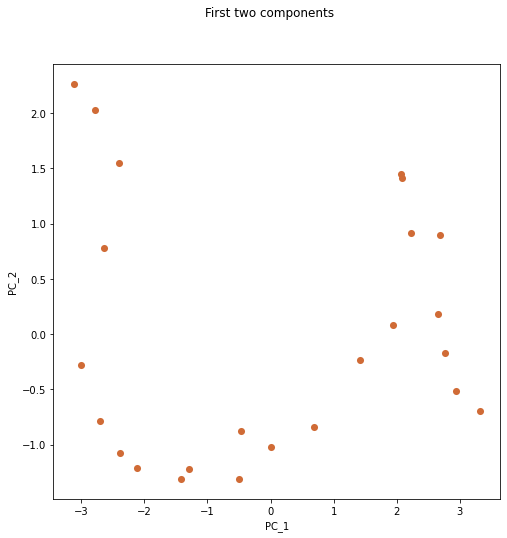

In [78]:
df_projected=pca.transform(df_normal)
print(df_projected.shape)
plt.figure(figsize=(8,8))
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(df_projected[:,0], df_projected[:,1], c = "#D06B36", s = 50, linewidth=0)

In [79]:
column_names=np.asarray(df.columns.values)
#show top 10 loadings of PC 1  
pc_1_loadings = np.asarray(pca.components_[0])[np.argsort( np.abs(pca.components_[0]))[::-1]][0:10]
pc_1_names = np.asarray(column_names)[np.argsort( np.abs(pca.components_[0]))[::-1]][0:10]

for i in range(0, 10):
    print ( "Column \"" , pc_1_names[i] , "\" has a loading of: ", pc_1_loadings[i])

Column " International Passenger Revenue ($) " has a loading of:  -0.16199968464576156
Column " Transport Related Expenses ($) " has a loading of:  -0.16106948224386206
Column " ASM Prodcued per Employee Equivalent " has a loading of:  -0.15931076340220274
Column " Internation ASM as % of total ASM " has a loading of:  -0.15286125799865222
Column " Domestic ASM as % of total ASM " has a loading of:  0.15286125799865166
Column " Total Load Factor (%) " has a loading of:  -0.14547329170515624
Column " Domestic Load Factor (%) " has a loading of:  -0.14538520108090452
Column " Domestic Revenue as % of total Revenue " has a loading of:  0.1408375922062074
Column " International Revenue as % of total Revenue " has a loading of:  -0.14083759220620723
Column " International Revenue ($) per ASM " has a loading of:  -0.1407871972363434


In [80]:
pc_2_loadings = np.asarray(pca.components_[1])[np.argsort( np.abs(pca.components_[1]))[::-1]][0:10]
pc_2_names = np.asarray(column_names)[np.argsort( np.abs(pca.components_[1]))[::-1]][0:10]

for i in range(0, 10):
    print ( "Column \"" , pc_2_names[i] , "\" has a loading of: ", pc_2_loadings[i])

Column " Flight Attendant Employee Equivalents " has a loading of:  0.25208808250155984
Column "  Total Labour Operating Expenses per ASM($) " has a loading of:  0.224461311900948
Column " ASM Prodcued per Dollar Employee Compensation " has a loading of:  -0.22228280507598047
Column " Pilot and Co-Pilot equivalents " has a loading of:  0.211046187191845
Column " Total Departed Seats " has a loading of:  0.2078286141067167
Column " ASM Prodcued per Dollar Pilot Compensation " has a loading of:  -0.2059669584700797
Column " Full Time Employees Equivalents " has a loading of:  0.18804839919640554
Column " Management and Other Expenses per ASM " has a loading of:  0.18564543834673453
Column " Management and Other Expenses ($) " has a loading of:  0.1842090993247798
Column " CASM excluding Transport and Fuel ($ per ASM) " has a loading of:  0.18083931253479005


In [81]:
#Further PCA
#Local Amalysis
#Select first component

columns_selected = np.argsort( np.abs(pca.components_[0]))[::-1][0:10]
column_names_selected = column_names[columns_selected]
df_selected = df_normal[:][columns_selected]
df_selected=pd.DataFrame(df_selected)
df_selected.columns=column_names_selected


In [82]:
# Build a model that will return two principal components
pca_selected = PCA(n_components=2)

# We first fit a PCA model to the data
pca_selected.fit(df_selected)

PCA(n_components=2)

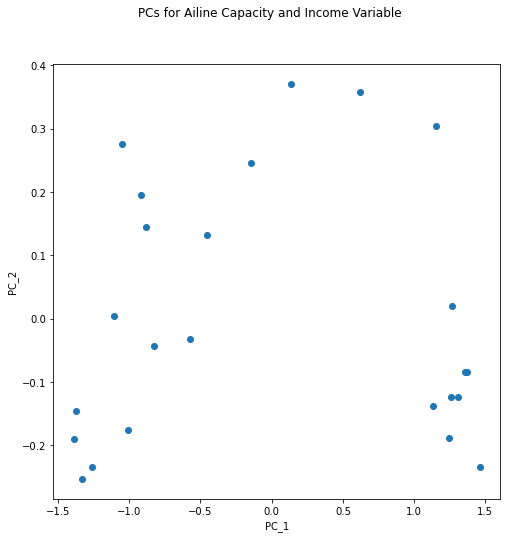

In [84]:
projected_df_selected = pca_selected.transform(df_selected)

plt.figure(figsize=(8,8))
plt.suptitle('PCs for Ailine Capacity and Income Variable')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projected_df_selected[:,0], projected_df_selected[:,1])

In [85]:
print ("--- Firstly, the first component: ")
pc_1_loadings = np.asarray(pca_selected.components_[0])[np.argsort( np.abs(pca_selected.components_[0]))[::-1]][0:10]
pc_1_names = np.asarray(column_names_selected)[np.argsort( np.abs(pca_selected.components_[0]))[::-1]][0:10]

for i in range(0, 10):
    print ( "Column \"" , pc_1_names[i] , "\" has a loading of: ", pc_1_loadings[i])

--- Firstly, the first component: 
Column " Transport Related Expenses ($) " has a loading of:  -0.3405620443161341
Column " ASM Prodcued per Employee Equivalent " has a loading of:  -0.33002181844219297
Column " International Passenger Revenue ($) " has a loading of:  -0.3282012550502565
Column " Internation ASM as % of total ASM " has a loading of:  -0.3229429801183477
Column " Domestic ASM as % of total ASM " has a loading of:  0.32294298011834666
Column " Domestic Revenue as % of total Revenue " has a loading of:  0.30970603944000696
Column " International Revenue as % of total Revenue " has a loading of:  -0.3097060394400065
Column " Total Load Factor (%) " has a loading of:  -0.30010981928283403
Column " Domestic Load Factor (%) " has a loading of:  -0.298751984653054
Column " International Revenue ($) per ASM " has a loading of:  -0.2960546891977534


In [86]:
print ("--- Secondly, the second component: ")
pc_2_loadings = np.asarray(pca_selected.components_[1])[np.argsort( np.abs(pca_selected.components_[1]))[::-1]][0:10]
pc_2_names = np.asarray(column_names_selected)[np.argsort( np.abs(pca_selected.components_[1]))[::-1]][0:10]

for i in range(0, 10):
    print ( "Column \"" , pc_2_names[i] , "\" has a loading of: ", pc_2_loadings[i])

--- Secondly, the second component: 
Column " Transport Related Expenses ($) " has a loading of:  0.4305515325040788
Column " ASM Prodcued per Employee Equivalent " has a loading of:  0.4293704251248163
Column " Domestic ASM as % of total ASM " has a loading of:  0.3816221568074916
Column " Internation ASM as % of total ASM " has a loading of:  -0.38162215680748934
Column " Total Load Factor (%) " has a loading of:  0.3269073226725054
Column " Domestic Load Factor (%) " has a loading of:  0.28532119234601677
Column " International Revenue ($) per ASM " has a loading of:  -0.22963588743609953
Column " International Revenue as % of total Revenue " has a loading of:  -0.215294750983823
Column " Domestic Revenue as % of total Revenue " has a loading of:  0.21529475098382284
Column " International Passenger Revenue ($) " has a loading of:  -0.0726814552284557


C:\Users\Arunima\AppData\Local\Temp/ipykernel_9068/696330269.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool)


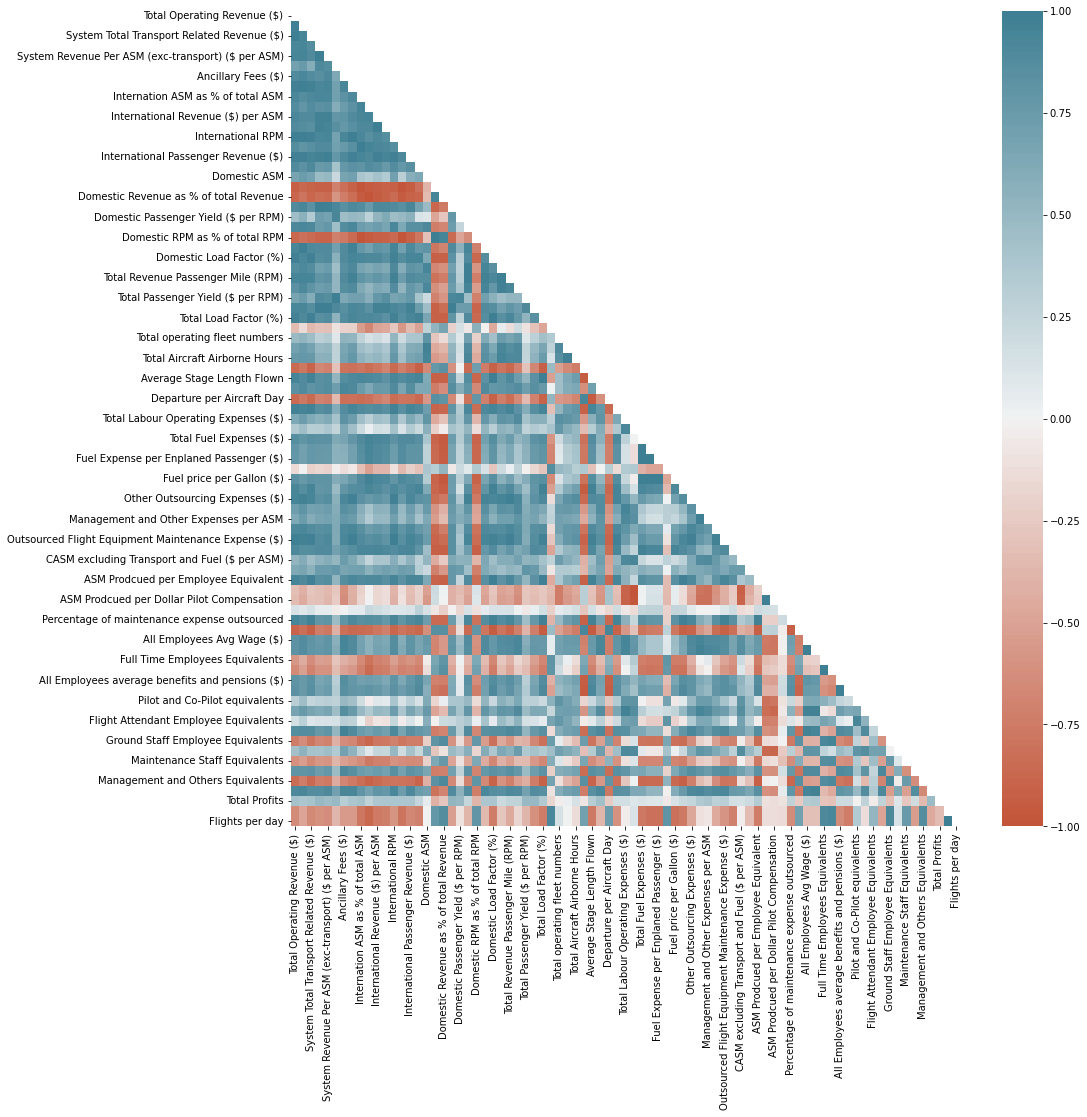

In [87]:
#Correlations accross all features with Revenue and Profits
corr = df.corr()
#print(corr.head())

plt.figure(figsize = (15,15))
import seaborn as sns

mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

ax = sns.heatmap(
    corr, 
    mask=mask,
    vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200))


Text(0.5, 1.0, 'Profits Correlation Bar')

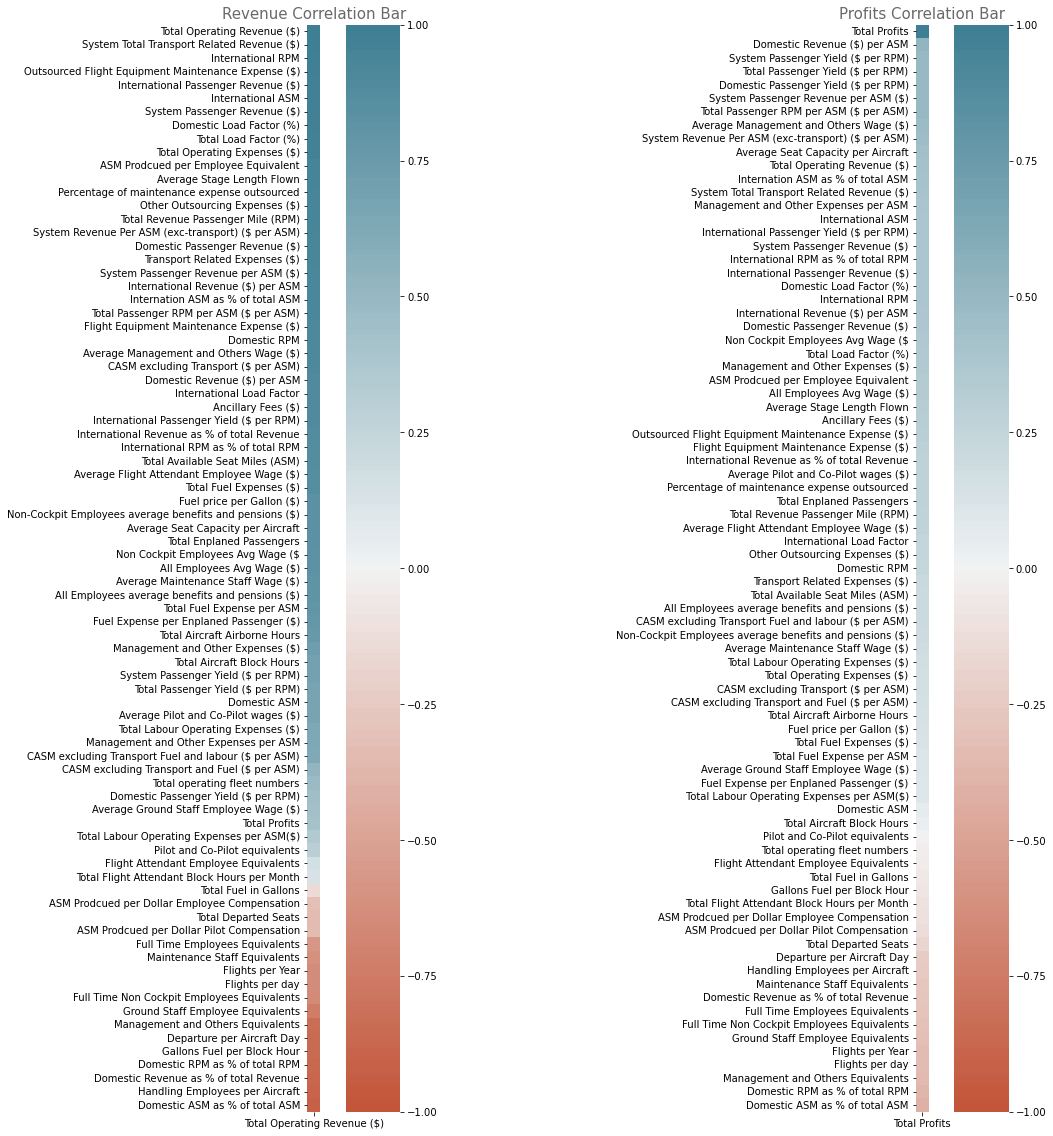

In [88]:
corr = df.corr()

#sort by the amount of correlation
revenue_corr = corr[["Total Operating Revenue ($)"]]
revenue_corr=revenue_corr.sort_values(by =["Total Operating Revenue ($)"],ascending=False)

profit_corr = corr[["Total Profits"]]
profit_corr=profit_corr.sort_values(by =["Total Profits"],ascending=False)

plt.figure(figsize = (20,20))

ax=plt.subplot(121)

import seaborn as sns
ax = sns.heatmap(
    revenue_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_title("Revenue Correlation Bar", fontsize=15, color='dimgrey')

ax1=plt.subplot(122)

ax1 = sns.heatmap(
    profit_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax1.set_title("Profits Correlation Bar", fontsize=15, color='dimgrey')

C:\Users\Arunima\AppData\Local\Temp/ipykernel_9068/3933502844.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool)


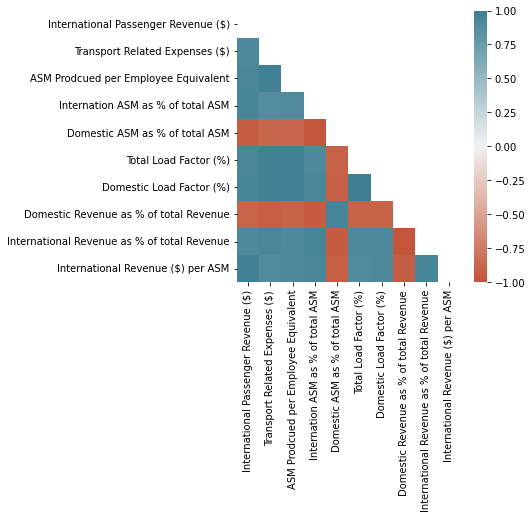

In [89]:
corr = df[column_names_selected].corr()
#print(corr.head())

plt.figure(figsize = (5,5))
import seaborn as sns

mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

ax = sns.heatmap(
    corr, 
    mask=mask,
    vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)

In [90]:
df[column_names_selected].describe()

International Passenger Revenue ($)  Transport Related Expenses ($)  \
count                         2.400000e+01                    2.400000e+01   
mean                          2.604308e+10                    1.284802e+10   
std                           8.587549e+09                    7.948852e+09   
min                           1.583341e+10                    1.388642e+09   
25%                           1.729038e+10                    3.555991e+09   
50%                           2.502071e+10                    1.702520e+10   
75%                           3.463072e+10                    1.943034e+10   
max                           3.851251e+10                    2.149814e+10   

       ASM Prodcued per Employee Equivalent  \
count                             24.000000   
mean                               2.361433   
std                                0.357964   
min                                1.876632   
25%                                1.949455   
50%                                2.515051   
75%                                2.640736   
max                                2.815807   

       Internation ASM as % of total ASM  Domestic ASM as % of total ASM  \
count                          24.000000                       24.000000   
mean                           29.247544                       70.752456   
std                             3.213268                        3.213268   
min                            24.999670                       66.383074   
25%                            26.153687                       67.909293   
50%                            29.146951                       70.853049   
75%                            32.090707                       73.846313   
max                            33.616926                       75.000330   

       Total Load Factor (%)  Domestic Load Factor (%)  \
count              24.000000                 24.000000   
mean               77.872490                 77.812068   
std                 5.720457                  6.714902   
min                67.484937                 65.913394   
25%                72.018898                 70.682892   
50%                80.051908                 80.124252   
75%                83.321806                 84.044001   
max                84.086431                 85.541313   

       Domestic Revenue as % of total Revenue  \
count                               24.000000   
mean                                72.547119   
std                                  4.207309   
min                                 66.455085   
25%                                 69.195253   
50%                                 71.614644   
75%                                 76.908814   
max                                 78.245932   

       International Revenue as % of total Revenue  \
count                                    24.000000   
mean                                     27.452881   
std                                       4.207309   
min                                      21.754068   
25%                                      23.091186   
50%                                      28.385356   
75%                                      30.804747   
max                                      33.544915   

       International Revenue ($) per ASM  
count                          24.000000  
mean                            0.094755  
std                             0.016775  
min                             0.072889  
25%                             0.080181  
50%                             0.092040  
75%                             0.108410  
max                             0.121573

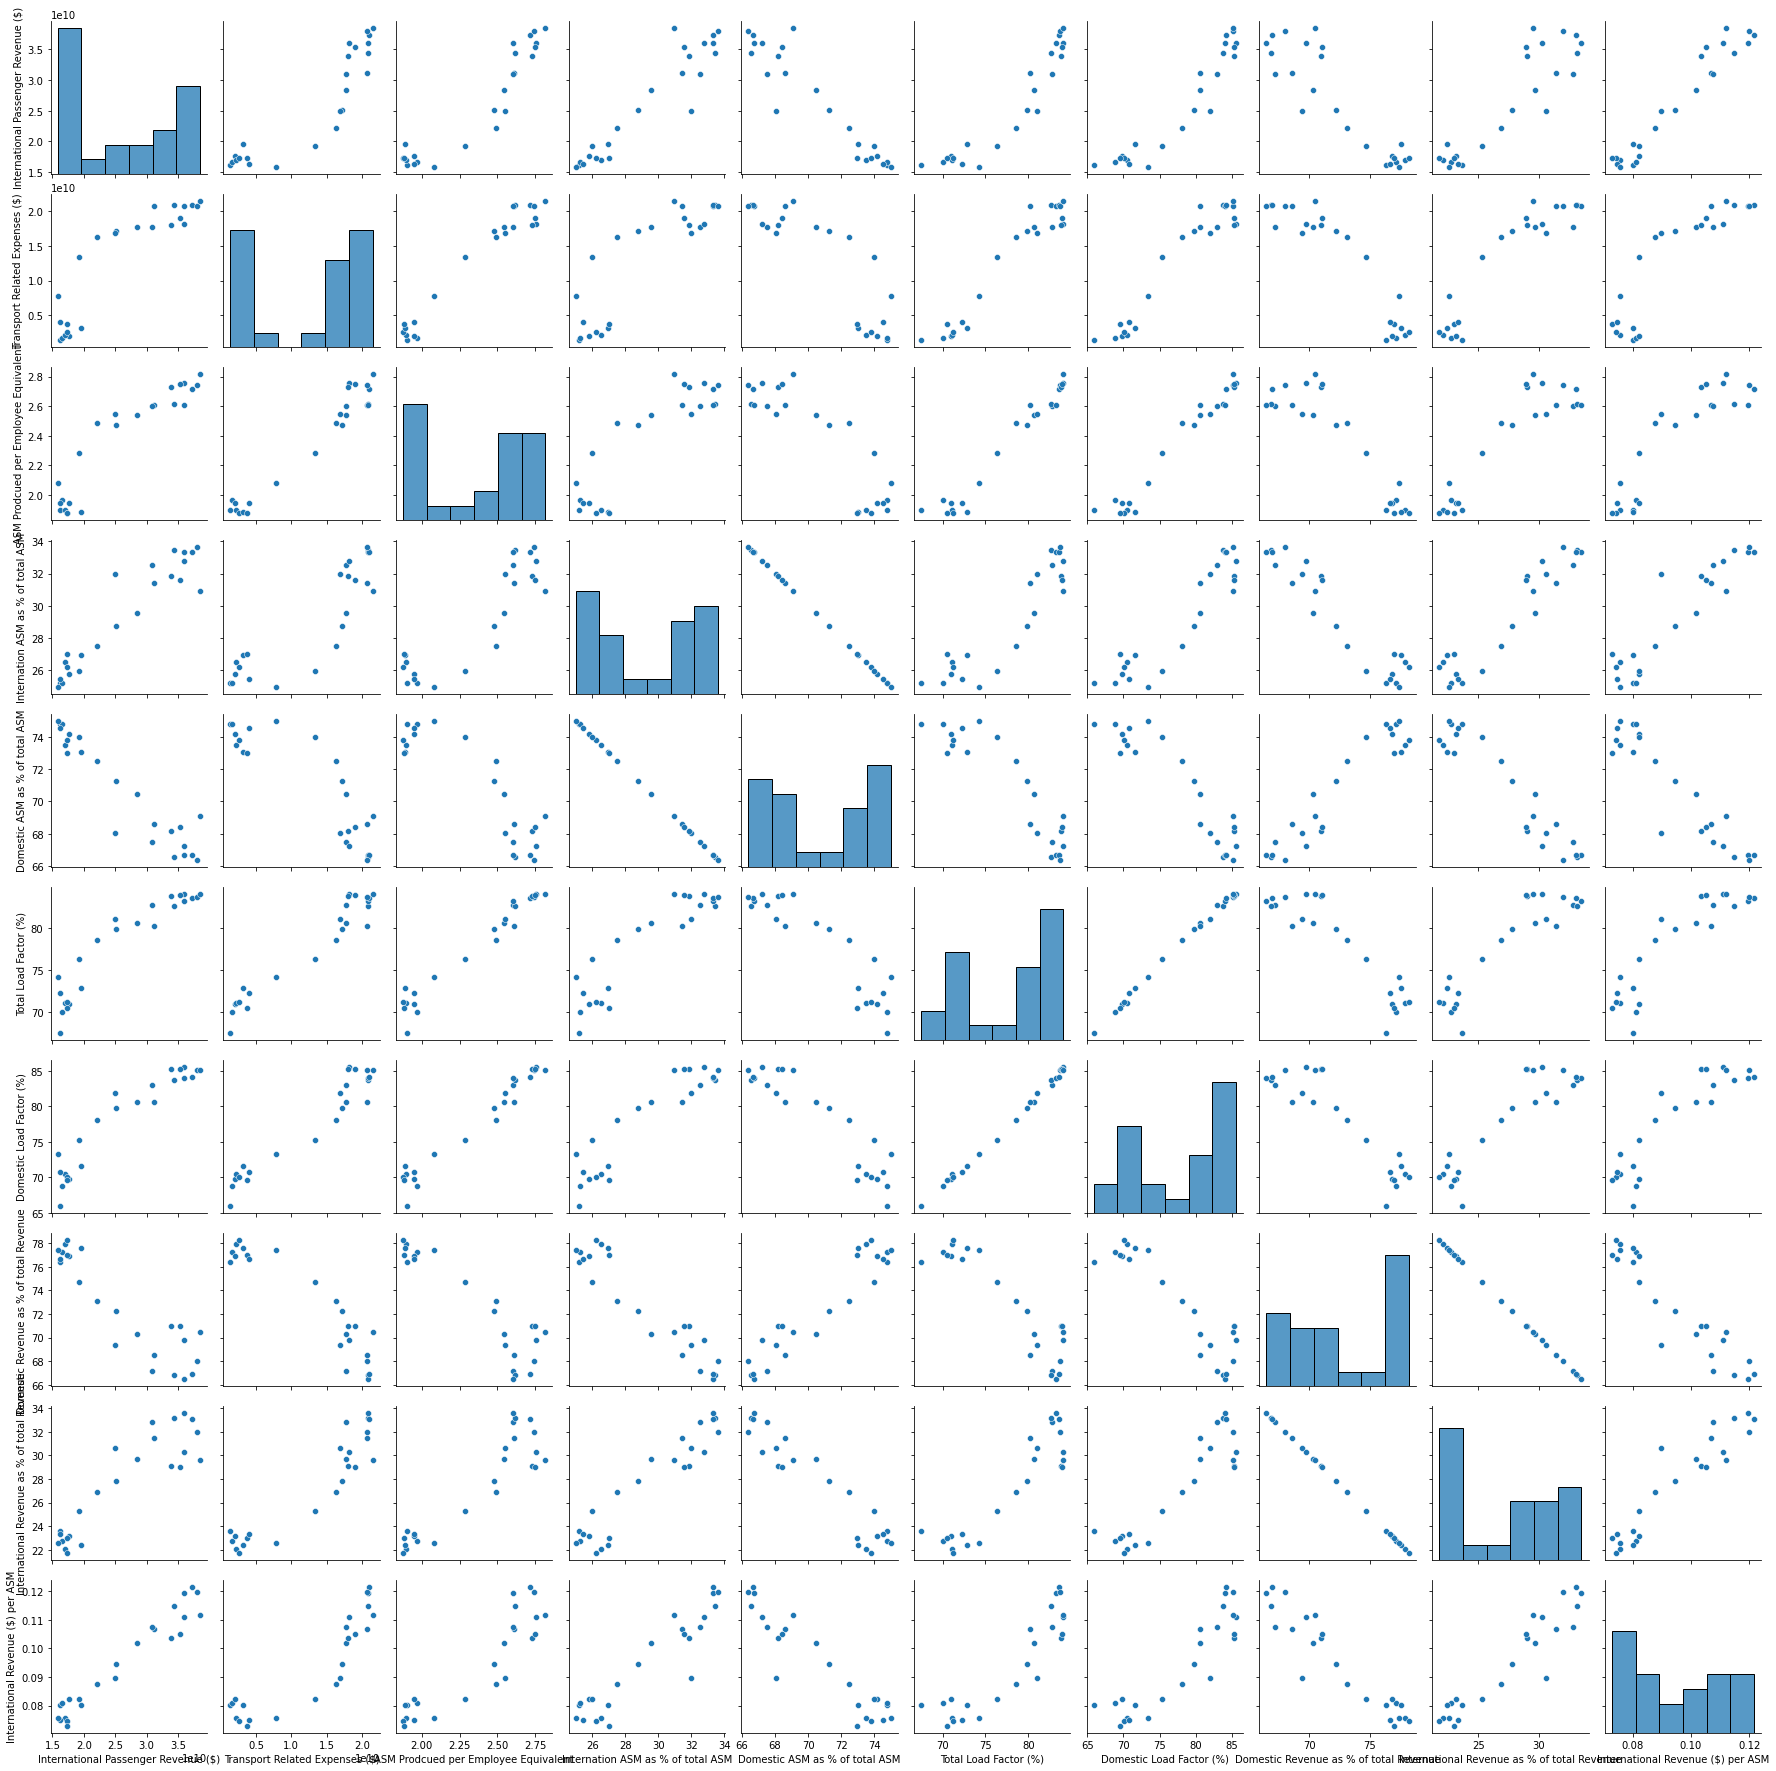

In [91]:
sns.pairplot(df[column_names_selected])

Text(0.5, 1.0, 'Total Industry Profits - 1995 to 2018 ')

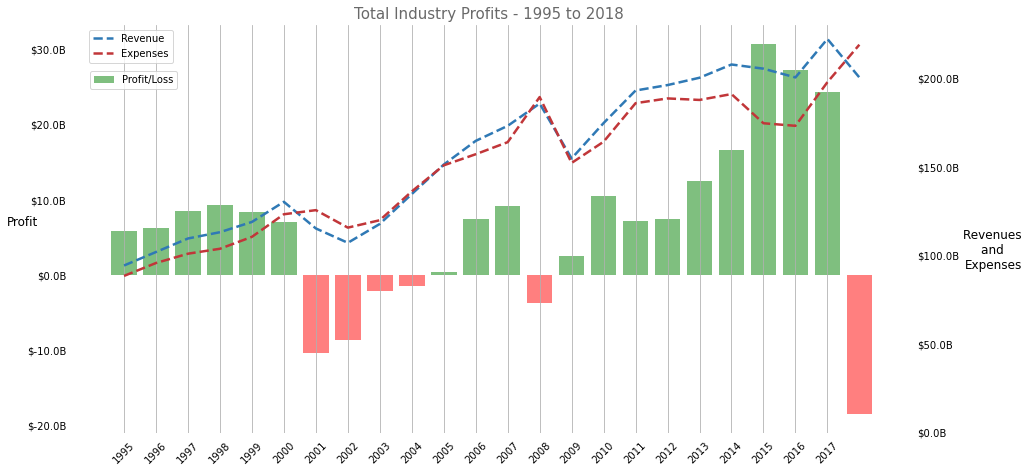

In [92]:
#Feature Importance
#EDA
#Revenue, Expenses and Profit

color = sns.color_palette("RdBu")
#sns.palplot(color)

#tick formatter 
def billions(x, pos):
    return '$%1.1fB' % (x*1e-9)
formatter = FuncFormatter(billions)

plt.figure(figsize=(15, 7.5)) 
ax1 = plt.subplot(111)  

Year=np.arange(1995,2019,1)

#turn off axis spines
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(False)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False) 

#share x axis
ax2 = ax1.twinx()

#turn off axis spines
ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)    
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(False)

#x axis tick parameters
ax1.xaxis.set_tick_params(labelsize=10, rotation=45)
ax1.xaxis.set_ticks(np.arange(1995, 2018, 1))

ax1.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)    
ax2.tick_params(right=False) 

ax1.set_ylabel("Profit", fontsize=12, rotation=0)

ax2.set_ylabel("Revenues \nand \nExpenses",fontsize=12,rotation=0)
ax2.yaxis.set_label_coords(1.1,0.5)

#plot data on axis
ax1.bar(Year, df["Total Profits"], label= "Profit/Loss", alpha=0.5, color=(df["Total Profits"] > 0).map({True: 'g', False: 'r'}))

ax2.plot(df["Total Operating Revenue ($)"], label ="Revenue",color =color[-1],ls="--", lw=2.5)
ax2.plot((df["Total Operating Expenses ($)"]), label ="Expenses",color =color[0],ls="--", lw=2.5)

#format y ticks to billions
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylim(0,230e9 )

#add legend
ax1.legend(bbox_to_anchor=(0.13, 0.9))
ax2.legend(bbox_to_anchor=(0.125, 1))
ax1.grid(False)
ax2.grid(False)
ax1.xaxis.grid(which="major")

#font parameters
title_font = {'family': 'sans-serif','color':  'dimgrey','weight': 'normal','size': 15,}#title font
plt.title("Total Industry Profits - 1995 to 2018 ", loc='center',fontdict=title_font, fontsize=15)

C:\Users\Arunima\AppData\Local\Temp/ipykernel_9068/1793989616.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Labels1)


Network carrier produce 4.029328467690855 % profit
Low cost carrier produce 10.07850169228896 % profit
Other airlines produce 10.897316249359356 % profit
[9.12855287e+10 3.87855471e+10 1.58015728e+10]
ratio of Network profit vs LCC  2.3535965210092393


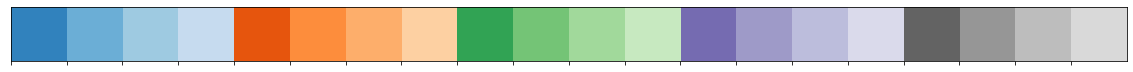

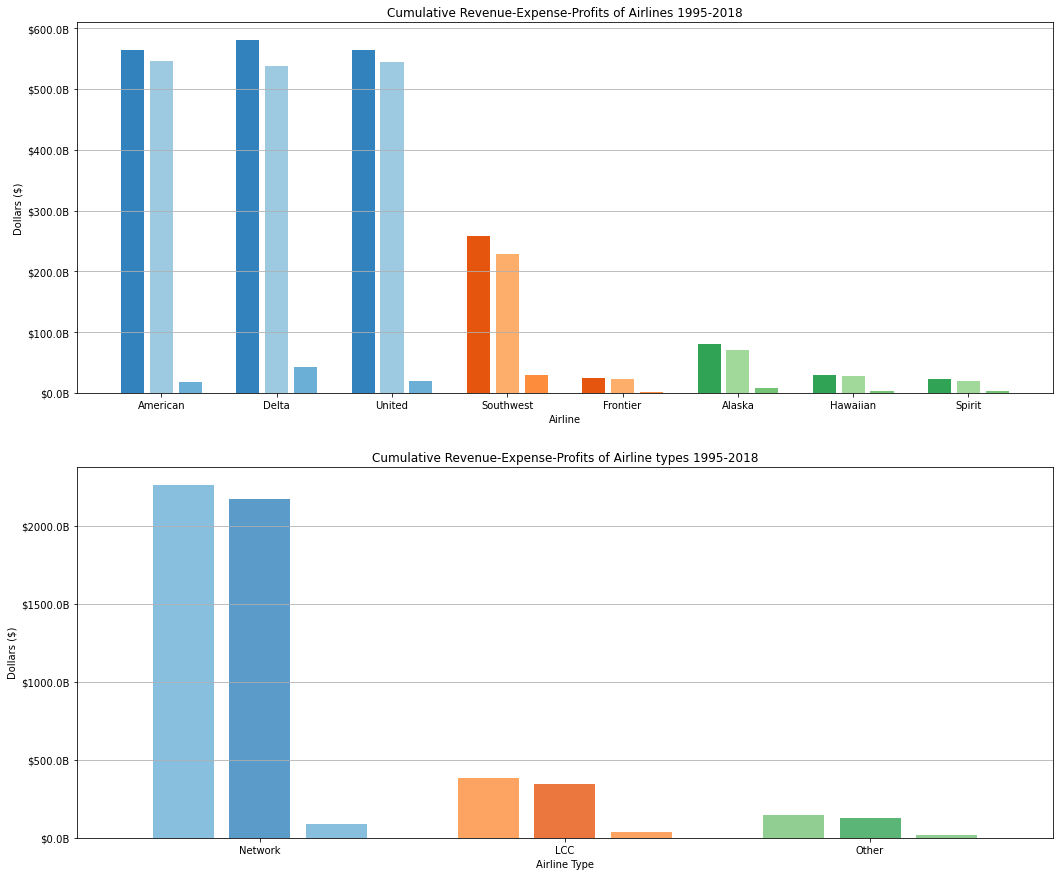

In [93]:
color = sns.color_palette("tab20c")
sns.palplot(color)

barwidth1=0.2
barwidth2=0.2

plt.figure(figsize=(17.5,15))

ax1=plt.subplot(211)

clrs1=[color[0],color[0],color[0],color[4],color[4],color[8],color[8],color[8]]
clrs2=[color[1],color[5],color[9]]

clrs3=[color[2],color[2],color[2],color[6],color[6],color[10],color[10],color[10]]
clrs4=[color[0],color[4],color[8]]

clrs5=[color[1],color[1],color[1],color[5],color[5],color[9],color[9],color[9]]
clrs6=[color[1],color[5],color[9]]

rev_x1=(np.arange(1,9))-0.25
exp_x1=(np.arange(1,9))
rev_x2=np.arange(1,4)-0.25
exp_x2=np.arange(1,4)

prof_x1=(np.arange(1,9))+0.25
prof_x2=np.arange(1,4)+0.25

ax1.bar(rev_x1, airlines_rev, color=clrs1,width=barwidth1)
ax1.bar(exp_x1, airlines_exp, color=clrs3, width=barwidth1)
ax1.bar(prof_x1, airlines_prof, color=clrs5, width=barwidth1)
ax1.yaxis.set_major_formatter(formatter)
ax1.set_ylabel("Dollars ($)")
ax1.set_xlabel("Airline")
ax1.set_xticklabels(Labels1)
ax1.set_title("Cumulative Revenue-Expense-Profits of Airlines 1995-2018")
ax1.grid(axis='y')

ax2=plt.subplot(212)

ax2.bar(rev_x2,airline_types_rev, color=clrs2,alpha=0.8,width=barwidth2)
ax2.bar(exp_x2,airline_types_exp, color=clrs4,alpha=0.8,width=barwidth2)
ax2.bar(prof_x2,airline_types_prof, color=clrs6,alpha=0.8,width=barwidth2)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Dollars ($)")
ax2.set_xlabel("Airline Type")
ax2.set_xticks((np.arange(4)))
ax2.set_xticklabels(Labels4)
ax2.set_xlim(0.4,3.6)
ax2.set_title("Cumulative Revenue-Expense-Profits of Airline types 1995-2018")
ax2.grid(axis='y')

print("Network carrier produce",(airline_types_prof/airline_types_rev)[0]*100, "% profit")
print("Low cost carrier produce",(airline_types_prof/airline_types_rev)[1]*100, "% profit")
print("Other airlines produce",(airline_types_prof/airline_types_rev)[2]*100, "% profit")


print(airline_types_prof)
print("ratio of Network profit vs LCC ",(airline_types_prof[0]/airline_types_prof[1]))

Text(0.5, 1.0, 'Airline Expense')

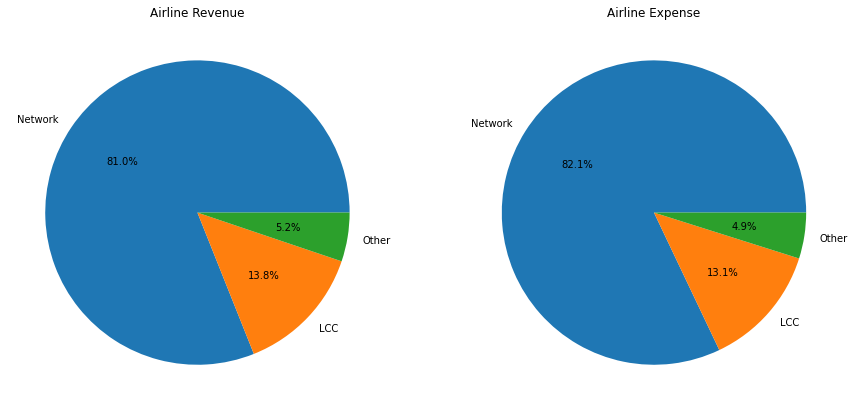

In [94]:
plt.figure(figsize=(15,15))
Labels=["Network","LCC","Other"]
ax1=plt.subplot(121)
ax1.pie(airline_types_rev, labels=Labels, autopct='%1.1f%%')
ax1.set_title("Airline Revenue")

ax2=plt.subplot(122)
ax2.pie(airline_types_exp, labels=Labels, autopct='%1.1f%%')
ax2.set_title("Airline Expense")

In [95]:
## Domestic vs International

df['International ASM']

Year
1995    2.101305e+11
1996    2.141017e+11
1997    2.225720e+11
1998    2.297577e+11
1999    2.357971e+11
2000    2.469238e+11
2001    2.389054e+11
2002    2.191512e+11
2003    2.118331e+11
2004    2.348554e+11
2005    2.553555e+11
2006    2.686901e+11
2007    2.836178e+11
2008    2.938901e+11
2009    2.803664e+11
2010    2.897003e+11
2011    3.031454e+11
2012    3.038437e+11
2013    3.092499e+11
2014    3.197523e+11
2015    3.265487e+11
2016    3.305125e+11
2017    3.386513e+11
2018    3.463945e+11
Name: International ASM, dtype: float64

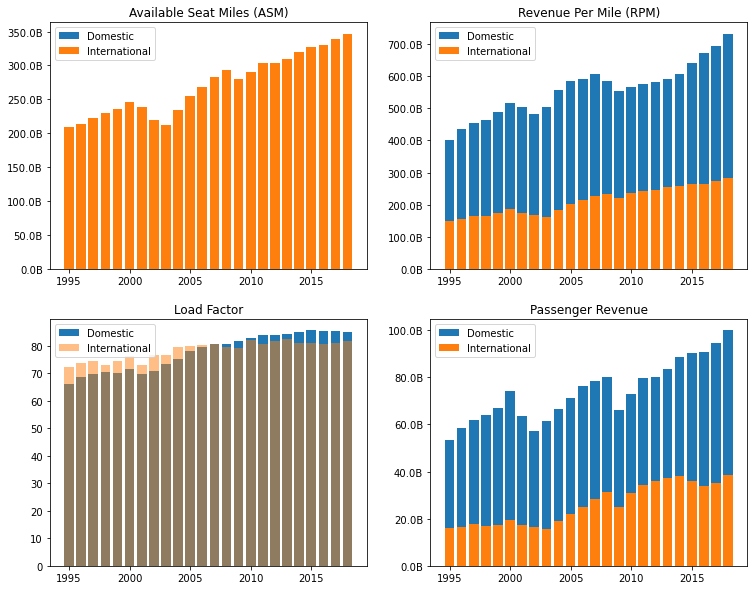

Avg Domestic ASM % of total:  70.75245609283677
Avg International ASM % of total:  29.24754390716321

Avg Domestic RPM % of total:  70.59322665257363
Avg International RPM % of total:  29.406773347426366

Avg Domestic Load factor 77.81206809170706
Avg International Load Factor 78.38270953327637

Avg Domestic Revenue % of total:  72.5471189801621
Avg International Revenue % of total:  27.452881019837907



In [96]:
def billions(x, pos):
    return '%1.1fB' % (x*1e-9)
formatter = FuncFormatter(billions)

plt.figure(figsize=(12.5,10))
ax1=plt.subplot(221)

p1=plt.bar(Year, df["Domestic ASM"], label="Domestic")
p2=plt.bar(Year, df["International ASM"], label="International")
ax1.yaxis.set_major_formatter(formatter)
plt.title("Available Seat Miles (ASM)")
plt.legend()

ax2=plt.subplot(222)

p3=plt.bar(Year, df["Domestic RPM"],label="Domestic")
p4=plt.bar(Year, df["International RPM"],label="International")
ax2.yaxis.set_major_formatter(formatter)
plt.title("Revenue Per Mile (RPM)")
plt.legend()

ax3=plt.subplot(223)

p5=plt.bar(Year, df["Domestic Load Factor (%)"],label="Domestic")
p6=plt.bar(Year, df["International Load Factor"],label="International", alpha=0.5)
plt.title("Load Factor")
plt.legend()

ax4=plt.subplot(224)

p7=plt.bar(Year, df["Domestic Passenger Revenue ($)"],label="Domestic")
p8=plt.bar(Year, df["International Passenger Revenue ($)"],label="International")
ax4.yaxis.set_major_formatter(formatter)
plt.title("Passenger Revenue")
plt.legend()           
plt.show()
           
print("Avg Domestic ASM % of total: ",np.mean(df["Domestic ASM as % of total ASM"]))
print("Avg International ASM % of total: ", np.mean(df["Internation ASM as % of total ASM"]))
print("")

print("Avg Domestic RPM % of total: ",np.mean(df["Domestic RPM as % of total RPM"]))
print("Avg International RPM % of total: ", np.mean(df["International RPM as % of total RPM"]))
print("")

print("Avg Domestic Load factor", np.mean(df["Domestic Load Factor (%)"]))
print("Avg International Load Factor", np.mean(df["International Load Factor"]))
print("")           

print("Avg Domestic Revenue % of total: ", np.mean(df["Domestic Revenue as % of total Revenue"]))
print("Avg International Revenue % of total: ", np.mean(df["International Revenue as % of total Revenue"]))
print("")


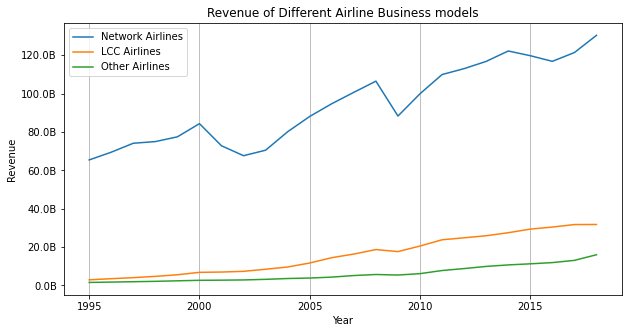

In [97]:
#airline types
network_rev=airline_rev[" --sub Network"]
LCC_rev=airline_rev[" -- sub LCC"]
Other_rev=airline_rev[" -- sub Other"]

airline_types_rev=[network_rev, LCC_rev, Other_rev]
Labels2=["Network Airlines","LCC Airlines","Other Airlines"]

plt.figure(figsize=(10,5))
ax1=plt.subplot(111)
ax1.plot(network_rev,label=Labels2[0])
ax1.plot(LCC_rev,label=Labels2[1])
ax1.plot(Other_rev,label=Labels2[2])
ax1.set_xlabel("Year")
ax1.set_ylabel("Revenue")
ax1.grid(axis='x')
ax1.set_title("Revenue of Different Airline Business models")
ax1.yaxis.set_major_formatter(formatter)
plt.legend()

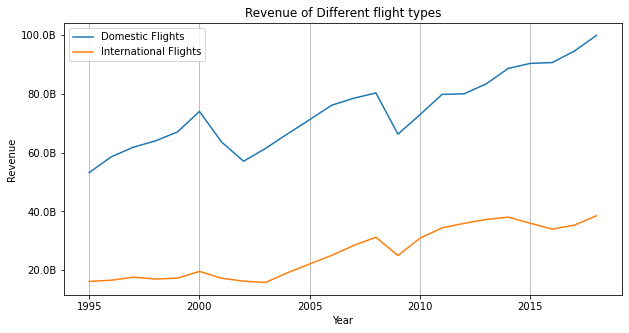

In [98]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(111)
ax1.plot(df["Domestic Passenger Revenue ($)"], label="Domestic Flights")
ax1.plot(df["International Passenger Revenue ($)"], label="International Flights")
ax1.grid(axis='x')
ax1.set_xlabel("Year")
ax1.set_ylabel("Revenue")
ax1.set_title("Revenue of Different flight types")
ax1.yaxis.set_major_formatter(formatter)
plt.legend()

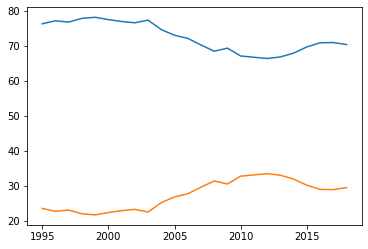

In [99]:
plt.plot(df["Domestic Revenue as % of total Revenue"])
plt.plot(df["International Revenue as % of total Revenue"])

Correlaion of number of passengers with revenue 0.8298954402831333


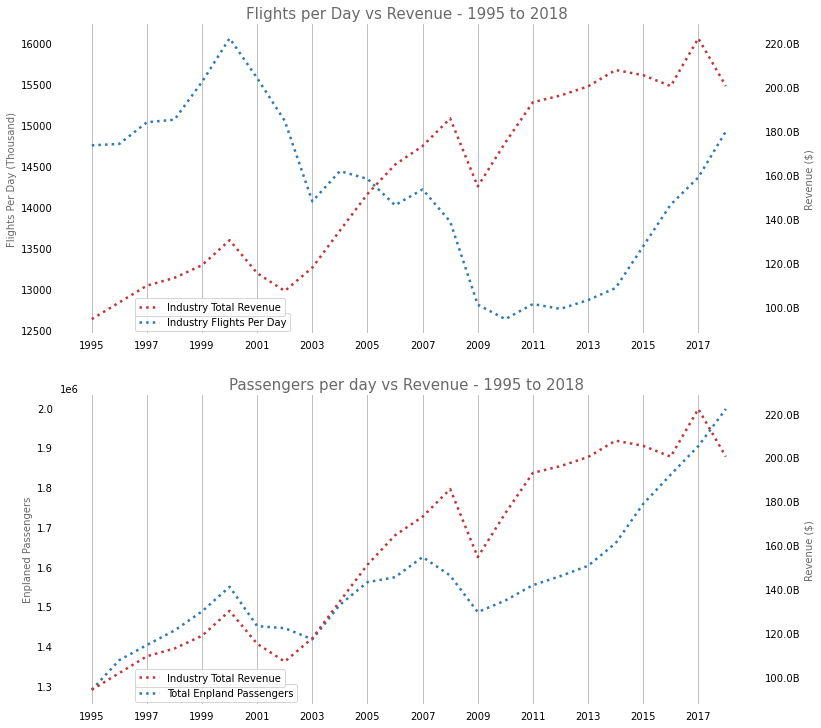

In [100]:
#Flight Traffic

plt.figure(figsize=(12.5, 12.5)) 
color = sns.color_palette("RdBu")
ax1 = plt.subplot(211)  

ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(False)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False) 

ax2 = ax1.twinx()

ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)    
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(False)

ax1.xaxis.set_tick_params(labelsize=10)
ax1.xaxis.set_ticks(np.arange(1995, 2018, 2))


ax1.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)    
ax2.tick_params(right=False) 

ax1.set_ylabel("Flights Per Day (Thousand)",color="dimgrey")
ax2.set_ylabel("Revenue ($)",color="dimgrey")

ax1.plot(df["Flights per day"],ls=":",lw=2.5,color=color[-1],label="Industry Flights Per Day")
ax2.plot(total_revenue,color =color[0],ls=":", lw=2.5, label="Industry Total Revenue")

ax1.legend(bbox_to_anchor=(0.1, 0.08), loc=2,)
ax2.legend(bbox_to_anchor=(0.1, 0.13), loc=2,)
ax1.grid(False)
ax2.grid(False)
ax1.xaxis.grid(which="major")

#format y ticks to billions for axis 2

ax2.yaxis.set_major_formatter(formatter)

title_font = {'family': 'sans-serif','color':  'dimgrey','weight': 'normal','size': 12,}#title font
plt.title("Flights per Day vs Revenue - 1995 to 2018 ", loc='center',fontdict=title_font, fontsize=15)

ax3 = plt.subplot(212)  

ax3.spines["top"].set_visible(False)    
ax3.spines["bottom"].set_visible(False)    
ax3.spines["right"].set_visible(False)    
ax3.spines["left"].set_visible(False) 

ax4 = ax3.twinx()

ax4.spines["top"].set_visible(False)    
ax4.spines["bottom"].set_visible(False)    
ax4.spines["right"].set_visible(False)    
ax4.spines["left"].set_visible(False)

ax3.xaxis.set_tick_params(labelsize=10)
ax3.xaxis.set_ticks(np.arange(1995, 2018, 2))


ax3.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)    
ax4.tick_params(right=False) 

ax3.set_ylabel("Enplaned Passengers",color="dimgrey")
ax4.set_ylabel("Revenue ($)",color="dimgrey")

ax3.plot((total_traffic["Total Enplaned Passengers"]/365),ls=":",lw=2.5,color=color[-1],label="Total Enpland Passengers")
ax4.plot(total_revenue,color =color[0],ls=":", lw=2.5, label="Industry Total Revenue")

ax3.legend(bbox_to_anchor=(0.1, 0.08), loc=2,)
ax4.legend(bbox_to_anchor=(0.1, 0.13), loc=2,)
ax3.grid(False)
ax4.grid(False)
ax3.xaxis.grid(which="major")

#format y ticks to billions for axis 2

ax4.yaxis.set_major_formatter(formatter)

title_font = {'family': 'sans-serif','color':  'dimgrey','weight': 'normal','size': 12,}#title font
plt.title("Passengers per day vs Revenue - 1995 to 2018 ", loc='center',fontdict=title_font, fontsize=15)
import scipy as sp
print("Correlaion of number of passengers with revenue", sp.stats.pearsonr(df["Total Enplaned Passengers"],df["Total Operating Revenue ($)"] )[0])

([<matplotlib.patches.Wedge at 0x26dc13beac0>,
 [Text(-0.6323200328079948, 0.9000952039143951, 'Network'),
  Text(0.4351244750595214, -1.0102805012491214, 'LCC'),
  Text(1.0768059653755704, -0.22469738078488183, 'Other')],
 [Text(-0.344901836077088, 0.4909610203169427, '69.5%'),
  Text(0.2373406227597389, -0.5510620915904298, '24.0%'),
  Text(0.5873487083866746, -0.12256220770084462, '6.5%')])

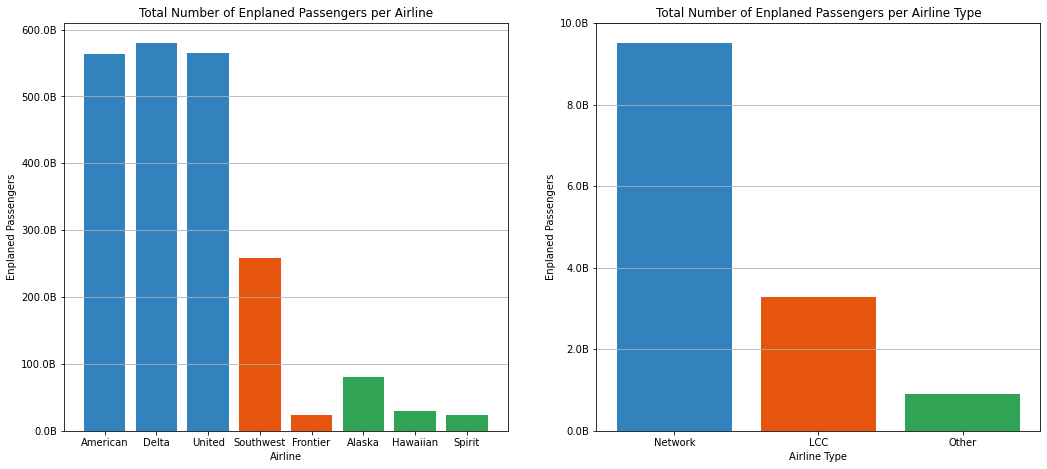

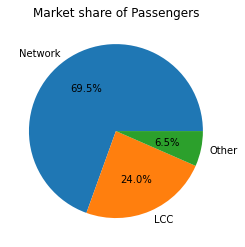

In [101]:
def billions(x, pos):
    return '%1.1fB' % (x*1e-9)
formatter = FuncFormatter(billions)

plt.figure(figsize=(17.5,7.5))
ax1=plt.subplot(121)
ax1.bar(pass_labels,airlines_pass, color=clrs1)
ax1.set_title("Total Number of Enplaned Passengers per Airline")
ax1.set_ylabel("Enplaned Passengers")
ax1.set_xlabel("Airline")
ax1.yaxis.set_major_formatter(formatter)
ax1.grid(axis='y')

ax2=plt.subplot(122)
ax2.bar(pass_type_labels,airline_types_pass,color=clrs4)
ax2.set_title("Total Number of Enplaned Passengers per Airline Type")
ax2.set_ylabel("Enplaned Passengers")
ax2.set_xlabel("Airline Type")
ax2.yaxis.set_major_formatter(formatter)
ax2.grid(axis='y')

plt.figure()
ax3=plt.subplot(111)
ax3.set_title("Market share of Passengers")
ax3.pie(airline_types_pass,labels=Labels, autopct='%1.1f%%')

IndexError: list index out of range

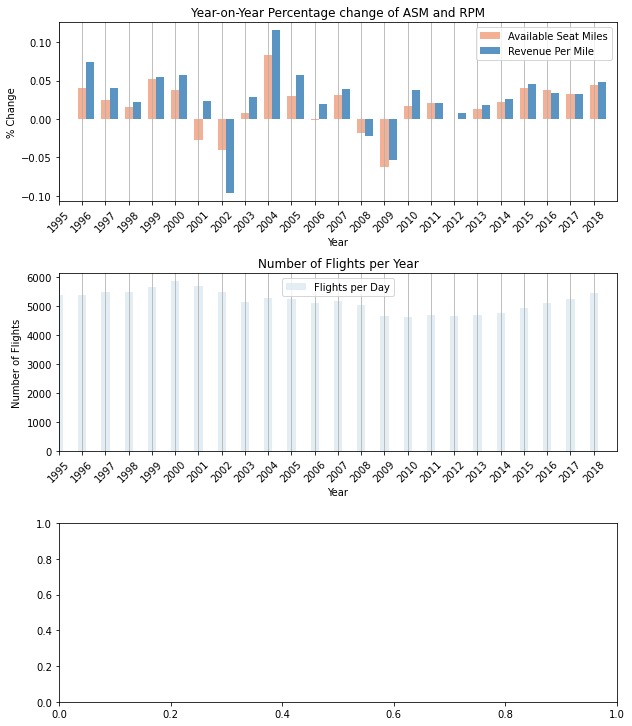

In [103]:
#Relative Change in ASM and RPM over the years is very small
#Calculate the percentage change and plot that instead of actual values
Year=np.arange(1995,2019,1)

#Percentage change ASM
df["% ASM Change"]=total_asm.pct_change()
df["% RPM Change"]=total_rpm.pct_change()

#fill first gap with 0
df["% RPM Change"]=df["% RPM Change"].fillna(0)
df["% ASM Change"]=df["% ASM Change"].fillna(0)

#define bar height variables
ASM=df["% ASM Change"].fillna(0)
RPM=df["% RPM Change"].fillna(0)

#set bar width
barwidth=0.35

#create figure
plt.figure(figsize=(10,12.5))
ax1=plt.subplot(311)
plt.subplots_adjust(hspace=0.4)

#x position of bars (asm at x and rpm at x + barwidth)
asm_x=Year
rpm_x=[x+barwidth for x in asm_x]

#plot bars
ax1.bar(asm_x,ASM,width=barwidth,color =color[1],alpha=0.8, label="Available Seat Miles" )
ax1.bar(rpm_x,RPM,width=barwidth, color=color[5],alpha=0.8, label="Revenue Per Mile")


#configure axis, ticks and legend
ax1.set_xlabel("Year")
ax1.set_ylabel("% Change")
ax1.set_title("Year-on-Year Percentage change of ASM and RPM")
#ax1.set_xticks(rotation=45)
ax1.set_xlim(1997,2019)
plt.xticks(rotation=45)
ax1.set_xticks(Year)
ax1.grid(axis='x')
ax1.legend()

ax2=plt.subplot(312)

flights=df["Flights per Year"]


flights_x=Year

plt.bar(flights_x, flights, width=barwidth,color=color[3], alpha=0.8, label="Flights per Day")

#configure axis, ticks and legend
plt.xlabel("Year")
plt.ylabel("Number of Flights")
plt.title("Number of Flights per Year")
plt.xticks(rotation=45)
plt.xlim(1995,2019)
ax2.xaxis.set_ticks(Year)
plt.grid(axis='x')
plt.legend()

ax3=plt.subplot(313)

passengers=(df["Total Enplaned Passengers"])

pass_x=Year

plt.bar(pass_x, passengers, width=barwidth,color=color[7], alpha=0.8, label="Passengers per Year")

#configure axis, ticks and legend
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.title("Number of Passengers per Year")
plt.xticks(rotation=45)
plt.xlim(1995,2019)
ax3.xaxis.set_ticks(Year)
plt.grid(axis='x')
plt.legend()

print("ASM recovered from 2008 by ", (ASM[2018]-ASM[2009]))
print("RPM recovered from 2008 by ", (RPM[2018]-RPM[2009]))
print("")
print("No. of Passengers recovered from 2008 by",((flights[2018]-flights[2009])/flights[2009])*100, "%")
print("No. of Passengers recovered from 2008 by",((passengers[2018]-passengers[2009])/passengers[2009])*100, "%")

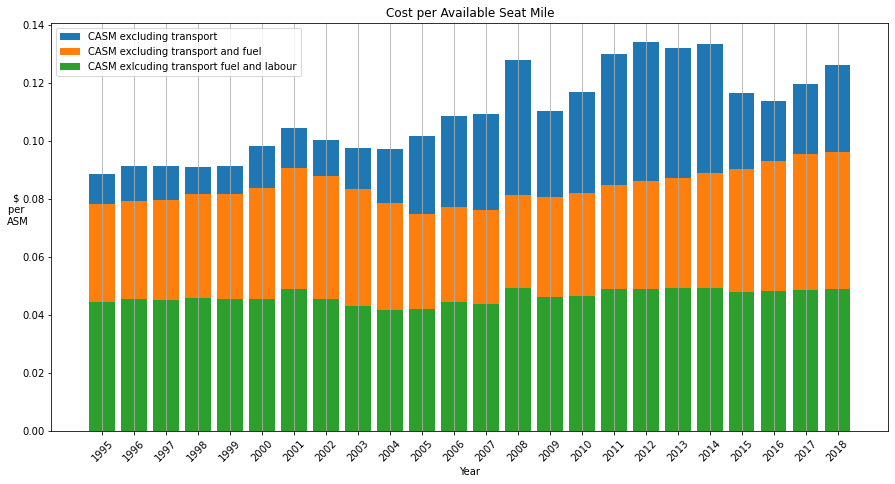

overall increase of CASM with labour,excluding transport and fuel is  0.01770683731309612
overall increase of CASM with labour and fuel excluding transport is  0.03761917555709278


In [104]:
#Cost per Available Seat Mile (CASM)
plt.figure(figsize=(15,7.5))

casm1=df["CASM excluding Transport ($ per ASM)"]
casm2=df["CASM excluding Transport and Fuel ($ per ASM)"]
casm3=df["CASM excluding Transport Fuel and labour ($ per ASM)"]

p1=plt.bar(Year,casm1, label="CASM excluding transport")
p2=plt.bar(Year,casm2, label="CASM excluding transport and fuel")
p3=plt.bar(Year,casm3, label="CASM exlcuding transport fuel and labour")

plt.title("Cost per Available Seat Mile")
plt.ylabel("$ \nper \nASM", rotation=0)
plt.xlabel("Year")
plt.xticks(Year, rotation=45)
plt.grid(axis='x')
plt.legend(loc='upper left')

plt.show()
print("overall increase of CASM with labour,excluding transport and fuel is ",casm2[2018] - casm2[1995])
print("overall increase of CASM with labour and fuel excluding transport is ",casm1[2018] - casm1[1995])

33331773000.0
21498142430.0


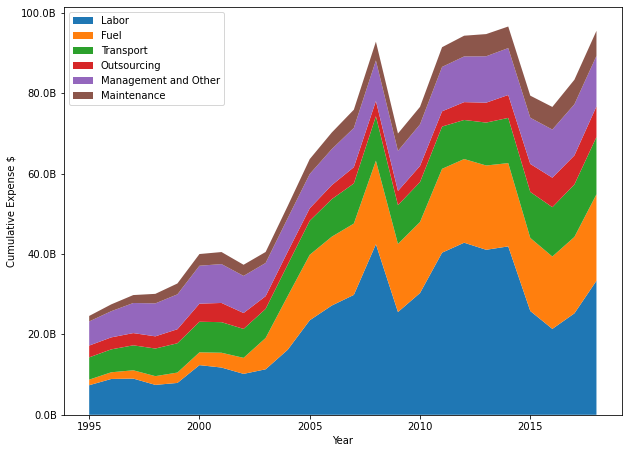

In [105]:
#Expenses Breakdown

#stack plot of expenses table. 
labels=["Labor","Fuel", "Transport", "Outsourcing","Management and Other", "Maintenance", "Outsourced Maintenance"]

plt.figure(figsize=(10,7.5))
ax=plt.subplot(111)

ax.stackplot(Year, expenses["Total Fuel Expenses ($)"],expenses["Transport Related Expenses ($)"],
              expenses["Other Outsourcing Expenses ($)"],expenses["Management and Other Expenses ($)"],
             expenses["Flight Equipment Maintenance Expense ($)"], 
              expenses["Outsourced Flight Equipment Maintenance Expense ($)"], labels=labels)


ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel("Cumulative Expense $")
ax.set_xlabel("Year")

plt.legend(loc="upper left")
print(expenses["Total Fuel Expenses ($)"][2018])
print(expenses["Transport Related Expenses ($)"][2018])

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-1.159725195938864, 1.103156389203214, -1.1128622987654158, 1.206135312920789)

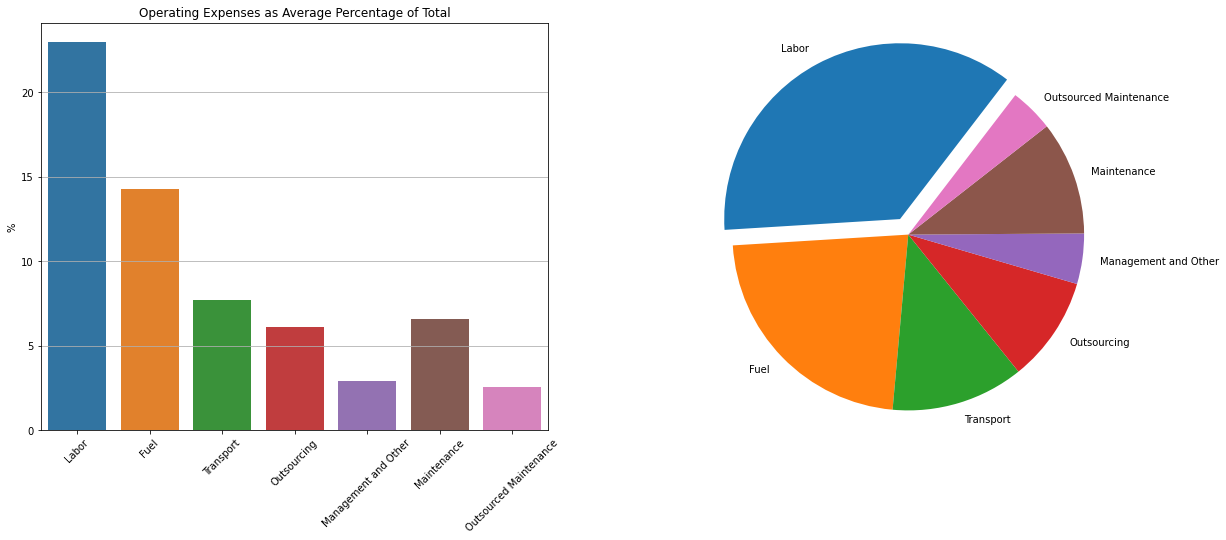

In [106]:
# take average percentage of total expenses and plot against each feature selected
plt.figure(figsize=(20,7.5))

ax1=plt.subplot(121)

total=expenses["Total Operating Expenses ($)"]

labor_perc=np.mean((expenses["Total Labour Operating Expenses ($)"]/total)*100)
fuel_perc= np.mean((expenses["Total Fuel Expenses ($)"]/total)*100)
trans_perc=np.mean((expenses["Transport Related Expenses ($)"]/total)*100)
outsource_perc= np.mean((expenses["Other Outsourcing Expenses ($)"]/total)*100)
mgmnt_perc= np.mean((expenses["Management and Other Expenses ($)"]/total)*100)
maint_perc= np.mean((expenses["Flight Equipment Maintenance Expense ($)"]/total)*100)
outs_maint_perc= np.mean((expenses["Outsourced Flight Equipment Maintenance Expense ($)"]/total)*100)

expense_percentages=[labor_perc,fuel_perc, trans_perc,outsource_perc,mgmnt_perc,maint_perc,outs_maint_perc]

ax1=sns.barplot(labels, expense_percentages)

plt.grid(axis='y')
plt.title("Operating Expenses as Average Percentage of Total")
plt.ylabel("%")
plt.xticks(rotation=45)

ax2=plt.subplot(122)

explode = (0.1, 0, 0, 0,0,0,0)  # explode 1st slice

plt.pie(expense_percentages,explode=explode, labels=labels, startangle=52.5)

plt.axis('equal')

In [108]:
#Breakdown of Labour expenses through Employee Compensation

#sankey diagram 1st layer connections 
print("All expenses fraction of revenue:")

print((df["Total Labour Operating Expenses ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Total Fuel Expenses ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Transport Related Expenses ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Other Outsourcing Expenses ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Management and Other Expenses ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Flight Equipment Maintenance Expense ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Outsourced Flight Equipment Maintenance Expense ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Total Profits"]).sum()/(df["Total Operating Revenue ($)"].sum()))

avg_emp_exp=np.mean(df["Total Labour Operating Expenses ($)"]/df["Full Time Employees Equivalents"])

print("Compensation fraction of revenue:")
print((df["All Employees average benefits and pensions ($)"]/df["Total Operating Revenue ($)"]).sum())
print((df["Average Pilot and Co-Pilot wages ($)"]/df["Total Operating Revenue ($)"]).sum())
print((df["Average Flight Attendant Employee Wage ($)"]/df["Total Operating Revenue ($)"]).sum())
print((df["Average Ground Staff Employee Wage ($)"]/df["Total Operating Revenue ($)"]).sum())
print((df["Average Maintenance Staff Wage ($)"]/df["Total Operating Revenue ($)"]).sum())
print((df["Average Management and Others Wage ($)"]/df["Total Operating Revenue ($)"]).sum())

All expenses fraction of revenue:
0.21342525222233955
0.14657654986779392
0.08174145917688909
0.05848542118351285
0.02783913366573641
0.06196952027358395
0.02509547573764702
0.041718579260328716
Compensation fraction of revenue:
2.637208409141488e-06
2.364866882147188e-05
6.671064619080196e-06
6.580704937256467e-06
1.0152527404755336e-05
1.173264519961953e-05


In [114]:
pip install plotly

In [115]:
import plotly.graph_objects as go

In [116]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 10,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Total System Revenue", "Labor Expenses","Fuel Expenses", "Transport Expenses", "OutSourcing Expenses", 
               "Management Expenses", "Flight Equipment Maintenance", "Flight Equipment OutSourcing Expenses", "Profits",
              "Non Cockput Employee Wage", "All Employee Benefits", "Pilot Wage", "Flight Attendant Wage",
               "Ground Staff Wage","Maintenance Wage", "Management/Other Wage"],
      color = ["dodgerblue", "red","blueviolet","gold","orchid","teal", "gray","orange","limegreen",
               "red","red","red","red","red","red","red",]
    ),
    link = dict(
      source = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
      value =  [210000, 150000, 80000, 60000, 30000, 60000, 30000, 40000, 6000, 3000, 30000, 7000,7000,10000,12000]
  ))])

fig.update_layout(title_text="Sankey Diagram of Cumulative Cash Flow in US Commercial Airline Industry", font_size=12.5)
fig.show()


Pearsons Correlation between No. employees and Total Profits is:  -0.2924976366430855
Pearsons Correlation between No. employees and Total system Revenue is:  -0.575877386261329
Pearsons Correlation between No. employees and Total system Expenses is:  0.5404828946370223


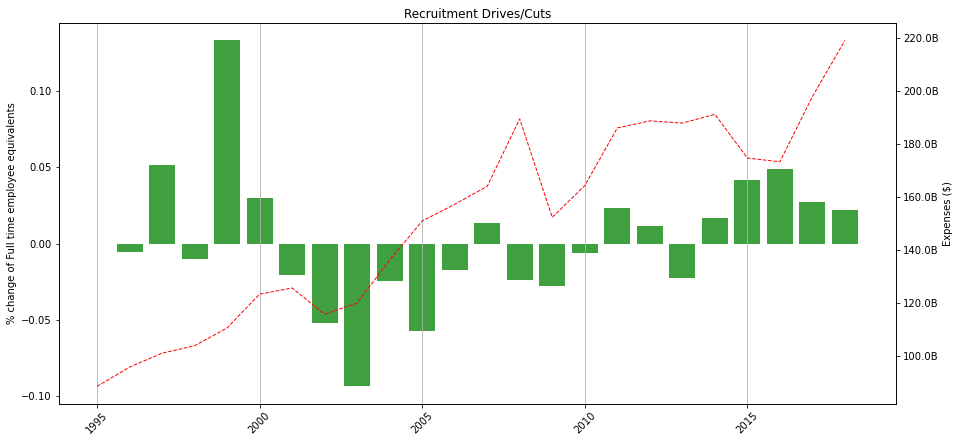

In [117]:
employee_change=compensation["Full Time Employees Equivalents"].pct_change()
Year=np.arange(1995,2019,1)

fig, ax = plt.subplots(figsize=(15,7))


ax.bar(Year,employee_change, alpha=0.75, color = 'g')
plt.title("Recruitment Drives/Cuts")
ax.set_ylabel("% change of Full time employee equivalents")
plt.xticks(rotation=45)


ax2 = ax.twinx()

ax2.plot(df["Total Operating Expenses ($)"], lw=1, ls='--', color='r')
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Expenses ($)")
ax.grid(axis='x')

import scipy as sp
print("Pearsons Correlation between No. employees and Total Profits is: ", 
      sp.stats.pearsonr(compensation["Full Time Employees Equivalents"],
                        df["Total Profits"])[0])

print("Pearsons Correlation between No. employees and Total system Revenue is: ", 
      sp.stats.pearsonr(compensation["Full Time Employees Equivalents"],
                        df["Total Operating Revenue ($)"])[0])

print("Pearsons Correlation between No. employees and Total system Expenses is: ", 
      sp.stats.pearsonr(compensation["Full Time Employees Equivalents"],
                        -1*df["Total Operating Expenses ($)"])[0])

In [118]:
#Forecasting and Modelling


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters


<function pandas.plotting._misc.register()>

In [119]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=5).mean()
    rolling_std = timeseries.rolling(window=5).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))


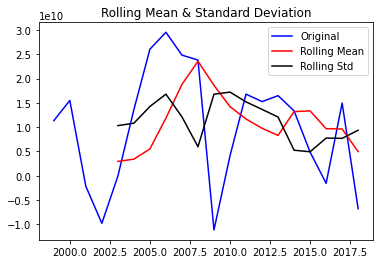

ADF Statistic: -2.5406273430542408
p-value: 0.1058995088319164
Critical Values:
	1%: -3.8326031418574136
	5%: -3.0312271701414204
	10%: -2.655519584487535


In [120]:
rev = df['Total Operating Revenue ($)'] 
rolling_mean = rev.rolling(window=5).mean()
rev_minus_mean = rev - rolling_mean
rev_minus_mean.dropna(inplace=True)    

get_stationarity(rev_minus_mean)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

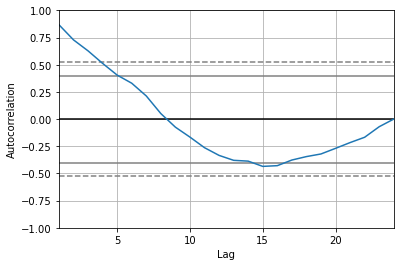

In [121]:
pd.plotting.autocorrelation_plot(rev)

In [122]:
model=ARIMA(rev, order=(1,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Arunima\anaconda3\lib\site-

                                   ARIMA Model Results                                   
Dep. Variable:     D.Total Operating Revenue ($)   No. Observations:                   23
Model:                            ARIMA(1, 1, 0)   Log Likelihood                -567.862
Method:                                  css-mle   S.D. of innovations    12760244313.465
Date:                           Sun, 06 Nov 2022   AIC                           1141.725
Time:                                   23:26:50   BIC                           1145.131
Sample:                                        1   HQIC                          1142.581
                                                                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                4.613e+09    2.2e+09      2.095    

<AxesSubplot:xlabel='Year'>

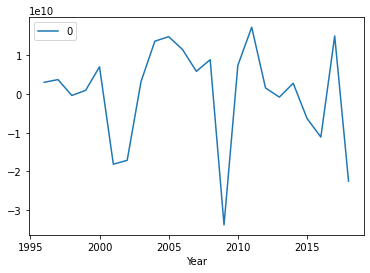

In [123]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

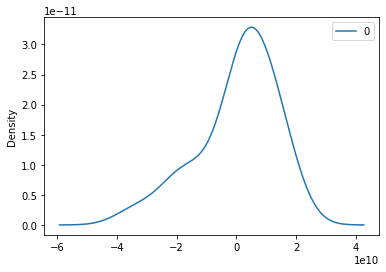

In [124]:
residuals.plot(kind='kde')

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




predicted=154358918484.799622, expected=174677395010.000061
predicted=177854791388.344604, expected=193040699220.000031
predicted=198379297421.966003, expected=196105250449.999908
predicted=202320897768.285828, expected=200244883860.000061
predicted=206262827986.595215, expected=207713887300.000061
predicted=213566089755.321075, expected=205360892950.000031
predicted=211560398013.583191, expected=200413561330.000031
predicted=205991830336.752899, expected=222127901510.000000
predicted=226282800734.734070, expected=200413561330.000031
Test MSE: 197356282715316060160.000
R squared:  -0.3842834011327134


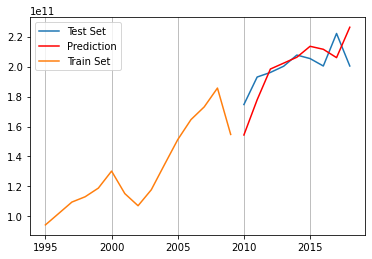

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X = rev.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
train_years, test_years  = (1995 + np.arange(0,size)) , (1995 + np.arange(size,len(X)))
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

r_sq=r2_score(test, predictions)
print('R squared: ', r_sq)

# plot
#
plt.plot(test_years, test, label="Test Set")
plt.plot(test_years, predictions, color='red', label="Prediction")
plt.plot(train_years, train, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




predicted=208303836190.783234
predicted=217300991599.157166
predicted=220649477835.272034


C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



predicted=225094079657.104858
predicted=230322110254.977295
predicted=235166388687.638611
predicted=239955130471.696899
predicted=244828061383.932251
predicted=249691601522.520233
predicted=254541627032.154938
34
24


C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



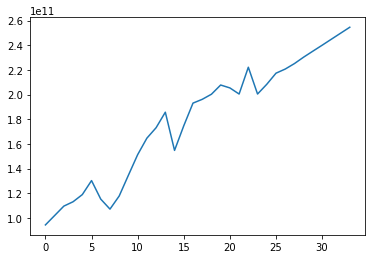

In [126]:
X = rev.values
size = int(len(X))
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
    
plt.plot(history)
print(len(history))
print(len(X))

C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



[ 5.55409392e+09 -1.09871107e+13]


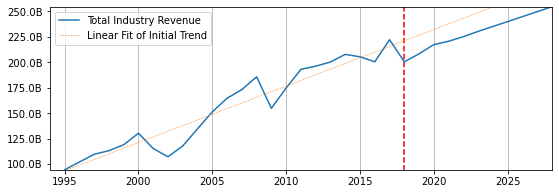

In [127]:
plt.figure(figsize=(9,3))

ax1=plt.subplot(111)

px = np.arange(1995,2029)

ax1.plot(px,history, label="Total Industry Revenue")
ax1.vlines(x=2018, ymin=0, ymax=(300*10**11), ls='dashed', color='r')
ax1.set_ylim(min(history), max(history))

c = np.polyfit(Year, rev, 1)
print(c)
p = np.poly1d(c)

py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")
ax1.set_xlim(1994,2028)
ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

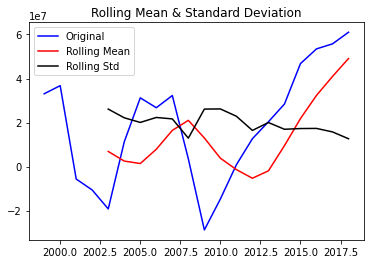

ADF Statistic: -1.845777593647198
p-value: 0.3579826943732298
Critical Values:
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603


In [128]:
#ARIMA for No. of Passengers Enplaned

passengers=df["Total Enplaned Passengers"]
rolling_mean = passengers.rolling(window=5).mean()
passengers_minus_mean = passengers - rolling_mean
passengers_minus_mean.dropna(inplace=True)    

get_stationarity(passengers_minus_mean)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

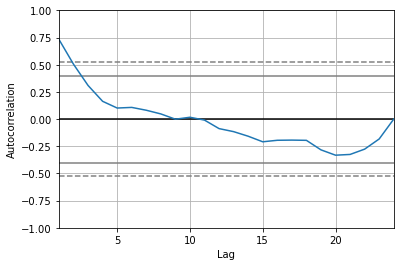

In [129]:
pd.plotting.autocorrelation_plot(passengers)

In [130]:
model1=ARIMA(passengers, order=(1,1,0))
model_fit1=model1.fit(disp=0)
print(model_fit1.summary())

                                  ARIMA Model Results                                  
Dep. Variable:     D.Total Enplaned Passengers   No. Observations:                   23
Model:                          ARIMA(1, 1, 0)   Log Likelihood                -417.310
Method:                                css-mle   S.D. of innovations       18309713.823
Date:                         Sun, 06 Nov 2022   AIC                            840.620
Time:                                 23:32:04   BIC                            844.027
Sample:                                      1   HQIC                           841.477
                                                                                       
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1.122e+07   5.36e+06      2.093      0.036    7.14e+05   

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Arunima\anaconda3\lib\site-

<AxesSubplot:xlabel='Year'>

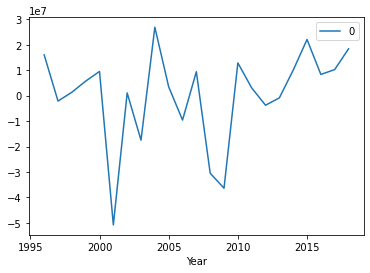

In [131]:
residuals1=pd.DataFrame(model_fit1.resid)
residuals1.plot()

<AxesSubplot:ylabel='Density'>

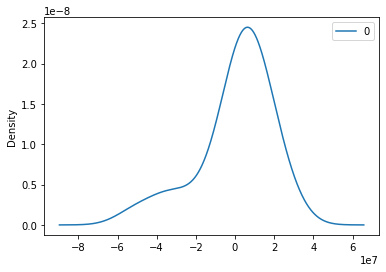

In [132]:
residuals1.plot(kind='kde')

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




predicted=540607898.302266, expected=552919514.000000
predicted=558899716.149006, expected=567022189.000000
predicted=573895170.400293, expected=575338160.000000
predicted=581720263.571243, expected=584814665.000000
predicted=591494560.838076, expected=605529024.000000
predicted=614253364.124149, expected=641648148.000000
predicted=655118928.646412, expected=668648686.000000
predicted=682117338.277933, expected=694836039.000000
predicted=709177784.480014, expected=728935700.000000
Test MSE: 212427025904258.906
R squared:  0.9380804422705621


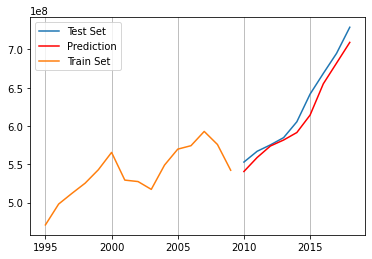

In [133]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X1 = passengers.values
size1 = int(len(X1) * 0.66)
train1, test1 = X1[0:size1], X1[size1:len(X1)]
train_years1, test_years1  = (1995 + np.arange(0,size1)) , (1995 + np.arange(size1,len(X1)))
history1 = [x for x in train1]
predictions1 = list()
for t in range(len(test1)):
    model1 = ARIMA(history1, order=(1,1,0))
    model_fit1 = model1.fit(disp=0)
    output1 = model_fit1.forecast()
    yhat1 = output1[0]
    predictions1.append(yhat1)
    obs1 = test1[t]
    history1.append(obs1)
    print('predicted=%f, expected=%f' % (yhat1, obs1))

error1 = mean_squared_error(test1, predictions1)
print('Test MSE: %.3f' % error1)


r_sq1=r2_score(test1, predictions1)
print('R squared: ', r_sq1)

# plot
#
plt.plot(test_years1, test1, label="Test Set")
plt.plot(test_years1, predictions1, color='red', label="Prediction")
plt.plot(train_years1, train1, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with d

predicted=747016985.779846
predicted=760549751.493460
predicted=772737559.258844
predicted=784526238.937446
predicted=796196093.055141
predicted=807830473.237921
predicted=819454236.232192
predicted=831074814.125335
predicted=842694434.394565
predicted=854313766.160733
34
24


C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



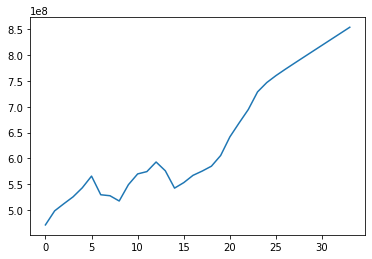

In [134]:
X1 = passengers.values
size1 = int(len(X1))
history1 = [x for x in X1]
predictions1 = list()
for t in range(10):
    model1 = ARIMA(history1, order=(2,1,0))
    model_fit1 = model1.fit(disp=0)
    output1 = model_fit1.forecast()
    yhat1 = output1[0]
    history1.append(yhat1)
    print('predicted=%f' % (yhat1))
    
plt.plot(history1)
print(len(history1))
print(len(X1))

C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



[ 7.53180499e+06 -1.45412014e+10]


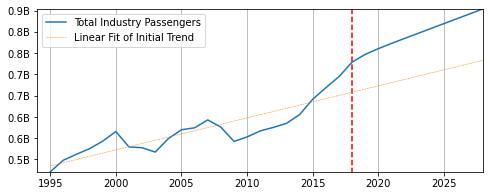

In [135]:
plt.figure(figsize=(8,3))

ax1=plt.subplot(111)
px = np.arange(1995,2029)
ax1.plot(px,history1, label="Total Industry Passengers")
ax1.vlines(x=2018, ymin=0, ymax=(300*10**11), ls='dashed', color='r')
ax1.set_ylim(min(history1), max(history1))

c = np.polyfit(Year, passengers, 1)
print(c)
p = np.poly1d(c)

py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")
ax1.set_xlim(1994,2028)
ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

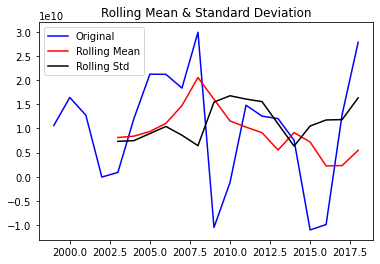

ADF Statistic: -3.4869003235371134
p-value: 0.008329964321485752
Critical Values:
	1%: -3.859073285322359
	5%: -3.0420456927297668
	10%: -2.6609064197530863


In [136]:

#ARIMA for expenses

exp=df["Total Operating Expenses ($)"]
rolling_mean = exp.rolling(window=5).mean()
exp_minus_mean = exp - rolling_mean
exp_minus_mean.dropna(inplace=True)    

get_stationarity(exp_minus_mean)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

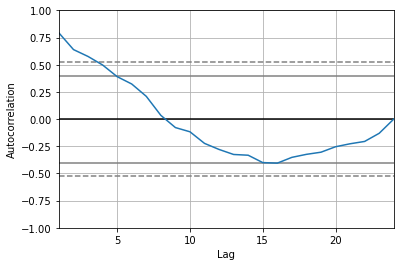

In [137]:
pd.plotting.autocorrelation_plot(exp)

In [138]:
model2=ARIMA(exp, order=(2,1,0))
model_fit2=model2.fit(disp=0)
print(model_fit2.summary())

                                   ARIMA Model Results                                    
Dep. Variable:     D.Total Operating Expenses ($)   No. Observations:                   23
Model:                             ARIMA(2, 1, 0)   Log Likelihood                -567.383
Method:                                   css-mle   S.D. of innovations    12418874534.371
Date:                            Sun, 06 Nov 2022   AIC                           1142.767
Time:                                    23:36:27   BIC                           1147.309
Sample:                                         1   HQIC                          1143.909
                                                                                          
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 5.671e+09   1.73e+09    

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Arunima\anaconda3\lib\site-

<AxesSubplot:xlabel='Year'>

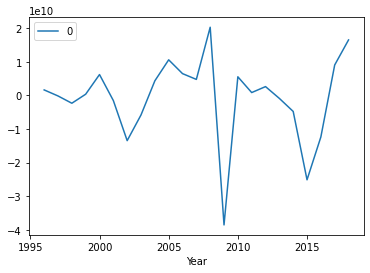

In [139]:
residuals2=pd.DataFrame(model_fit2.resid)
residuals2.plot()

<AxesSubplot:ylabel='Density'>

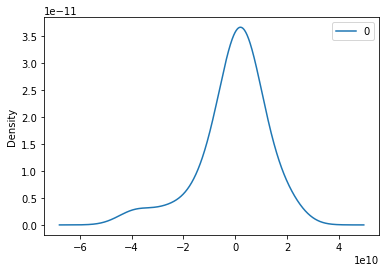

In [140]:
residuals2.plot(kind='kde')

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




predicted=173833734151.383972, expected=164152976630.000000
predicted=182484218846.025024, expected=185895476149.999939
predicted=182706414372.700134, expected=188574523300.000031
predicted=189299528520.186554, expected=187725860459.999939
predicted=196979444879.257080, expected=191035957879.999969
predicted=199794567281.772308, expected=174572436249.999939
predicted=186467271454.803131, expected=173121583029.999939
predicted=185101695957.592163, expected=197726952170.000000
predicted=199384416446.547302, expected=218881654370.000000
Test MSE: 170154732025209585664.000
R squared:  0.24221204160865217


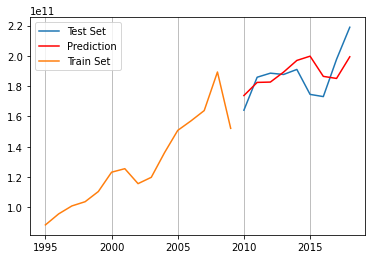

In [141]:
# using predict() on ARIMA results to make predictions
#train to test split will approx. be 2/3 to 1/3

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X2 = exp.values
size2 = int(len(X2) * 0.66)
train2, test2 = X2[0:size2], X2[size2:len(X2)]
train_years2, test_years2  = (1995 + np.arange(0,size2)) , (1995 + np.arange(size2,len(X2)))
history2 = [x for x in train2]
predictions2 = list()
for t in range(len(test2)):
    model2 = ARIMA(history2, order=(2,1,0))
    model_fit2 = model2.fit(disp=0)
    output2 = model_fit2.forecast()
    yhat2 = output2[0]
    predictions2.append(yhat2)
    obs2 = test2[t]
    history2.append(obs2)
    print('predicted=%f, expected=%f' % (yhat2, obs2))

error2 = mean_squared_error(test2, predictions2)
print('Test MSE: %.3f' % error2)


r_sq2=r2_score(test2, predictions2)
print('R squared: ', r_sq2)

# plot
#
plt.plot(test_years2, test2, label="Test Set")
plt.plot(test_years2, predictions2, color='red', label="Prediction")
plt.plot(train_years2, train2, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with d

predicted=214222996530.153107
predicted=215221861908.052246
predicted=224890254818.793976
predicted=230924962424.812622
predicted=234330769614.402832
predicted=239574118253.994598
predicted=245489478779.279572
predicted=250585271872.867218
predicted=255571081987.383728
predicted=260890687573.657562
34
24


C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



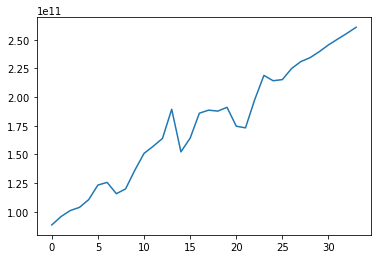

In [142]:
X2 = exp.values
size2 = int(len(X2))
history2 = [x for x in X2]
predictions2 = list()
for t in range(10):
    model2 = ARIMA(history2, order=(2,1,0))
    model_fit2 = model2.fit(disp=0)
    output2 = model_fit2.forecast()
    yhat2 = output2[0]
    history2.append(yhat2)
    print('predicted=%f' % (yhat2))
    
plt.plot(history2)
print(len(history2))
print(len(X2))

In [143]:
prediction_years=np.arange(1995, 2029)
len(prediction_years)

34

C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



[ 5.04375568e+09 -9.96967433e+12]


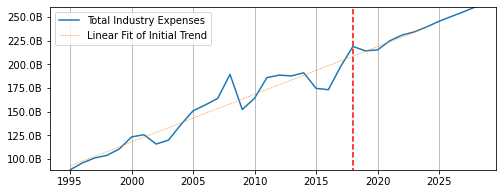

In [144]:
plt.figure(figsize=(8,3))

ax1=plt.subplot(111)

#ax1.plot(test_years2, test2, label="Test Set")
ax1.plot(prediction_years,history2, label="Total Industry Expenses")
ax1.vlines(x=2018, ymin=0, ymax=(300*10**11), ls='dashed', color='r')
ax1.set_ylim(min(history2), max(history2))

c = np.polyfit(Year, exp, 1)
print(c)
p = np.poly1d(c)
px = np.arange(1995,2025)
py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")

ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

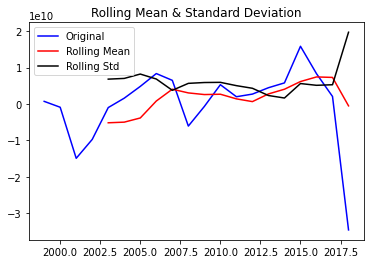

ADF Statistic: -2.5380340925284295
p-value: 0.10649228644273889
Critical Values:
	1%: -3.889265672705068
	5%: -3.0543579727254224
	10%: -2.66698384083045


In [145]:
#Arima for Profits
prof=df["Total Profits"]
rolling_mean = prof.rolling(window=5).mean()
prof_minus_mean = prof - rolling_mean
prof_minus_mean.dropna(inplace=True)    

get_stationarity(prof_minus_mean)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

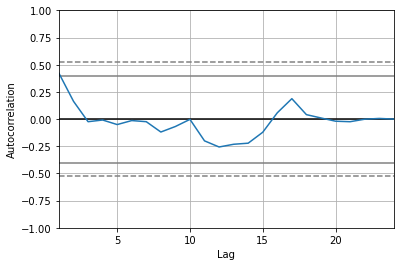

In [146]:
pd.plotting.autocorrelation_plot(prof)

In [147]:
model3=ARIMA(exp, order=(1,1,0))
model_fit3=model3.fit(disp=0)
print(model_fit3.summary())


                                   ARIMA Model Results                                    
Dep. Variable:     D.Total Operating Expenses ($)   No. Observations:                   23
Model:                             ARIMA(1, 1, 0)   Log Likelihood                -569.081
Method:                                   css-mle   S.D. of innovations    13465694664.238
Date:                            Sun, 06 Nov 2022   AIC                           1144.162
Time:                                    23:39:40   BIC                           1147.569
Sample:                                         1   HQIC                          1145.019
                                                                                          
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 5.671e+09   2.53e+09    

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Arunima\anaconda3\lib\site-

<AxesSubplot:xlabel='Year'>

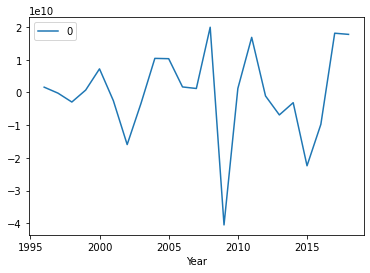

In [148]:
residuals3=pd.DataFrame(model_fit3.resid)
residuals3.plot()

<AxesSubplot:ylabel='Density'>

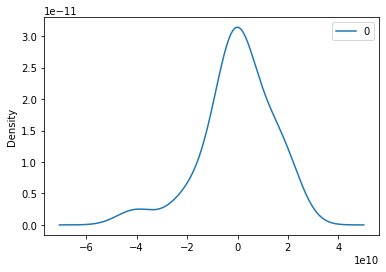

In [149]:
residuals3.plot(kind='kde')

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




predicted=5731539538.998408, expected=10524418380.000061
predicted=8093865416.138448, expected=7145223070.000092
predicted=4206296282.372046, expected=7530727149.999878
predicted=8925774980.208305, expected=12519023400.000122
predicted=12516894916.079960, expected=16677929420.000092
predicted=15335604461.015411, expected=30788456700.000092
predicted=31568230529.712677, expected=27291978300.000092
predicted=24428622601.451645, expected=24400949340.000000
predicted=26689131510.504551, expected=-18468093039.999969
Test MSE: 262377973688255381504.000
R squared:  -0.3691113962804611


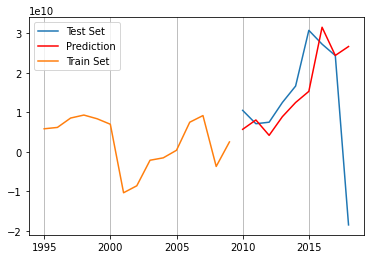

In [150]:
# using predict() on ARIMA results to make predictions
#train to test split will approx. be 2/3 to 1/3

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X3 = prof.values
size3 = int(len(X3) * 0.66)
train3, test3 = X3[0:size3], X3[size3:len(X3)]
train_years3, test_years3  = (1995 + np.arange(0,size3)) , (1995 + np.arange(size3,len(X3)))
history3 = [x for x in train3]
predictions3 = list()
for t in range(len(test3)):
    model3 = ARIMA(history3, order=(2,1,0))
    model_fit3 = model3.fit(disp=0)
    output3 = model_fit3.forecast()
    yhat3 = output3[0]
    predictions3.append(yhat3)
    obs3 = test3[t]
    history3.append(obs3)
    print('predicted=%f, expected=%f' % (yhat3, obs3))

error3 = mean_squared_error(test3, predictions3)
print('Test MSE: %.3f' % error3)


r_sq3=r2_score(test3, predictions3)
print('R squared: ', r_sq3)

# plot
#
plt.plot(test_years3, test3, label="Test Set")
plt.plot(test_years3, predictions3, color='red', label="Prediction")
plt.plot(train_years3, train3, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

C:\Users\Arunima\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with d

predicted=-24919801010.801201
predicted=-22973086518.672413
predicted=-23211131515.003624
predicted=-24501909631.217365
predicted=-25733052943.826145
predicted=-26859821887.101357
predicted=-27978181677.868416
predicted=-29105053165.257908
predicted=-30233839466.589256
predicted=-31362091171.801071
34
24


C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



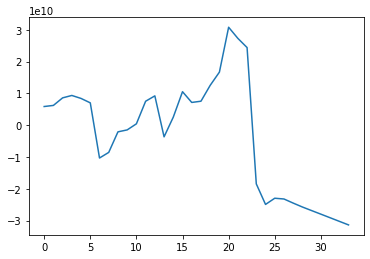

In [151]:
X3 = prof.values
size3 = int(len(X3))
history3 = [x for x in X3]
predictions3 = list()
for t in range(10):
    model3 = ARIMA(history3, order=(2,1,0))
    model_fit3 = model3.fit(disp=0)
    output3 = model_fit3.forecast()
    yhat3 = output3[0]
    history3.append(yhat3)
    print('predicted=%f' % (yhat3))
    
plt.plot(history3)
print(len(history3))
print(len(X3))

C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



[ 5.10338244e+08 -1.01743641e+12]


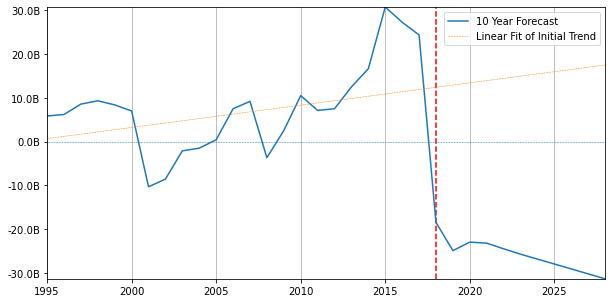

In [152]:
plt.figure(figsize=(10,5))

ax1=plt.subplot(111)
px = np.arange(1995,2029)
#ax1.plot(test_years2, test2, label="Test3Set")
ax1.plot(px,history3, label="10 Year Forecast")
ax1.vlines(x=2018, ymin=min(history3), ymax=(300*10**11), ls='dashed', color='r')
ax1.hlines(y=0, xmin=1990, xmax=2030, ls='dashed', lw=0.5)
ax1.set_ylim(min(history3), max(history3))
ax1.set_xlim(min(prediction_years), max(prediction_years))

c = np.polyfit(Year, prof, 1)
print(c)
p = np.poly1d(c)

py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")

ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

C:\Users\Arunima\AppData\Local\Temp/ipykernel_9068/1965383098.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



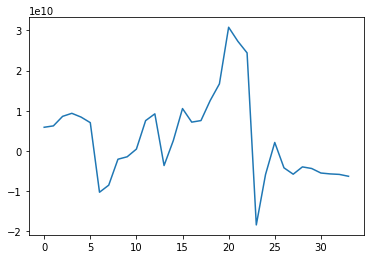

In [153]:
prof_alternate=np.array(history)-np.array(history2)
plt.plot(prof_alternate)

C:\Users\Arunima\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



[ 5.10338244e+08 -1.01743641e+12]


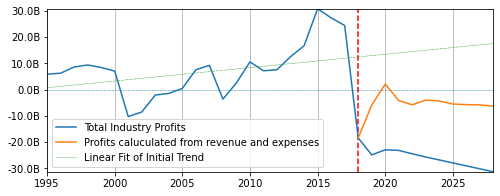

In [154]:
plt.figure(figsize=(8,3))

ax1=plt.subplot(111)

#ax1.plot(test_years2, test2, label="Test3Set")
ax1.plot(prediction_years,history3, label="Total Industry Profits")
plt.plot(prediction_years[23:], prof_alternate[23:], label='Profits caluculated from revenue and expenses')
ax1.vlines(x=2018, ymin=min(history3), ymax=(300*10**11), ls='dashed', color='r')
ax1.hlines(y=0, xmin=1990, xmax=2030, ls='dashed', lw=0.5)
ax1.set_ylim(min(history3), max(history3))
ax1.set_xlim(min(prediction_years), max(prediction_years))

c = np.polyfit(Year, prof, 1)
print(c)
p = np.poly1d(c)
px = np.arange(1995,2030)
py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")

ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()